# Where is meander bend apex? A new robust method for automatic detection of bend apex from curvature spatial distribution

This notebook goes along with the paper Lemay and Grimaud (submitted to *JGR Earth Surface*) and serves to analyze data and build the figures. Below is a reproduction of the abstract of the paper, then the script to build and analyze synthetic bends, and finally the code to load and analyze natural river data including supplementary material.

### author:
Martin LEMAY
martin.lemay@mines-paris.org

### Related publication

If you use this script, please refer to the following publication:
- Lemay, M., Grimaud, J. L. (submitted to JGR ???). Where is meander bend apex? A new robust method for automatic detection of bend apex from curvature spatial distribution. 

### Dependencies
- numpy
- scipy
- matplotlib
- pandas
- shapely
- dtw-python

## Abstract

Meander bend apex detection from remotely sensed data plays a pivotal role in meander morphometry and kinematic studies because measurements highly depend on its location. The representativity and sensitivity of the measurements upon bend apex location have however been poorly assessed. In this study, we propose a new and more robust method for the automatic detection of meander bend apex points from discretized channel centrelines. The method is based on the entire spatial distribution of curvature rather than identifying the point of maximum curvature. We propose here to define the apex as the median abscissa utilizing the curvature distribution as a weighting function. The methodology was applied to a dataset comprising synthetic bends and 1288 natural bends from the Amazon basin. Morphometric parameters contingent upon apex location were compared using both the proposed and the maximum curvature point methods. Results indicate that the proposed method of bend apex detection is much less sensitive to curvature distribution noise than identifying the maximum curvature point. Bend amplitude and extension are closer to their maximum values when apex is detected from the median abscissa. Finally, the correlation between bend asymmetry and curvature distribution skewness coefficients is improved with the proposed method. Defining the apex from the median abscissa rather than maximum curvature point results in morphometry measurements more representative of bend morphology.

## Synthetic bends analysis
Synthetic bends including perfect circular and Kinoshita-based (Kinoshita, 1961) bends were build using parametric curves:
        
* Circular bend: $\begin{cases}\begin{align*} &x(s)=A.\cos(\pi s/\lambda+\pi) \\ &y(s)=A.\sin(\pi s/\lambda) \end{align*}\end{cases}$

  where $x$ and $y$ are cartesian coordinates, $s$ is the curvilinear abscissa, $A$ is bend amplitude, and $\lambda$ is bend arc length.
* Kinoshita bend: $\begin{cases}\begin{align*} &\Theta(s)=\Theta_0.\cos\left(\frac{2\pi s}{\lambda}\right)+\Theta_0^3\left(Js.\sin\left(3\frac{2\pi s}{\lambda}\right)-Jf.\cos\left(3\frac{2\pi s}{\lambda}\right)\right) \\ &x(s+ds)=x(s)+ds*\cos(\Theta) \\ &y(s+ds)=y(s)+ds*\sin(\Theta) \end{align*}\end{cases}$

  where $\Theta$ and $\Theta_0$ are the angle and maximum angle, $Js$ is the skewness coefficient, $Jf$ is the flatness coefficient, and $ds$ the distance between two consecutive points.

For visualization purposes, bend centrelines were extended both upstream and downtream by mirroring the trajectory.

Here is the code that creates synthetic bends.

In [14]:
%load_ext autoreload
%autoreload 2

# import modules and load data
import os
import sys

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from scipy.signal import find_peaks

parent_dir_path = os.path.dirname(os.getcwd())
package_path = os.path.join(parent_dir_path, "src")
if package_path not in sys.path:
    sys.path.append(package_path)

import pybend.algorithms.centerline_process_function as cpf
import pybend.algorithms.synthetic_bends as sb

# output directory for figures
fig_path = str(os.path.join(os.getcwd(), ".outputs/"))
# create it if absent
if not os.path.exists(fig_path):
   os.makedirs(fig_path)
    
# Create analytic meander bend shape   
wavelength = 100.
nb_pts = 201
lx = np.linspace(-wavelength/2, wavelength/2, nb_pts)

# circular bend
ampl = wavelength / 2.
teta = 30. * np.pi / 180.
# single bend between inflection points
coords_cir = sb.circular_bend(nb_pts, ampl)
# add points from upstream and downstream bends
coords_cir = sb.mirror(coords_cir, int(nb_pts/4))

# kinoshita meander bends
Js = 0.
Jf = 0.
# K1: teta0=50°, Js=0, Jf=0
teta_max = 50. * np.pi / 180.
K1 = sb.kinoshita_bend(nb_pts, teta_max, Js, Jf)
K1 = sb.mirror(K1, int(nb_pts/4))

# K2: teta0=110°, Js=0, Jf=0
teta_max = 110. * np.pi / 180.
K2 = sb.kinoshita_bend(nb_pts, teta_max, Js, Jf)
K2 = sb.mirror(K2, int(nb_pts/4))

# K3: teta0=110°, Js=0., Jf=-0.06
teta_max = 110. * np.pi / 180.
Js = 0.0
Jf = -0.06
K3 = sb.kinoshita_bend(nb_pts, teta_max, Js, Jf)
K3 = mirror(K3, int(nb_pts/4))

# K4: teta0=110°, Js=0.01, Jf=0.03
teta_max = 110. * np.pi / 180.
Js = 0.01
Jf = 0.03
K4 = sb.kinoshita_bend(nb_pts, teta_max, Js, Jf)
K4 = sb.mirror(K4, int(nb_pts/4))

# K5: teta0=90°, Js=0.02, Jf=-0.04
teta_max = 90. * np.pi / 180.
Js = 0.02
Jf = -0.04
K5 = sb.kinoshita_bend(nb_pts, teta_max, Js, Jf)
K5 = sb.mirror(K5, int(nb_pts/4))

# K6: teta0=110°, Js=-0.03, Jf=0
teta_max = 110. * np.pi / 180.
Js = -0.03
Jf = 0. 
K6 = sb.kinoshita_bend(nb_pts, teta_max, Js, Jf)
K6 = sb.mirror(K6, int(nb_pts/4))

# K7: teta0=110°, Js=0.03, Jf=-0.03
teta_max = 110. * np.pi / 180.
Js = 0.03
Jf = -0.03
K7 = sb.kinoshita_bend(nb_pts, teta_max, Js, Jf)
K7 = sb.mirror(K7, int(nb_pts/4))

# K8: teta0=110°, Js=-0.03, Jf=-0.06
teta_max = 110. * np.pi / 180.
Js = -0.03
Jf = -0.06
K8 = sb.kinoshita_bend(nb_pts, teta_max, Js, Jf)
K8 = sb.mirror(K8, int(nb_pts/4))

# plot parameters
bend_coords = (coords_cir, K1, K2, K3, K4, K5, K6, K7, K8)
bend_names = ("Circular bend", "K1", "K2", "K3", "K4", "K5", "K6", "K7", "K8")
bend_markers = ('.', 'o', 'x', 's', 'd', 'v', '*', '+', '^', 'p')

# n=1, 2, 3, 4, 5, inf
n_labels = [f"n={i}" for i in range(1,6)] + ["n=inf"]
n_colors = ('#ABABAB', '#5F9ED1', '#006BA4', '#FFBC79', '#FF800E', '#C85200')
n_apex_markers = ('^', '+', 'x', 's', '*', 'o')
n_linestyles = ((0, (1, 5)), ':', '-.', (0, (5, 5)), '--', '-')

print("Synthetic bends created")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Synthetic bends created


Compute apex location depending on *n* and corresponding morphometric parameters.

In [15]:
nb_bends = len(bend_coords)
df_names = [("Apex_index", "Curv_Abs", "Amplitude", "Extension", "Asymmetry",
             "Distance_Max_Curv", "mean_abs", "std_dev", "skewness", "kurtosis"), 
            np.arange(1, 7, dtype=int)]
df_indexes = pd.MultiIndex.from_product(df_names, names=["Metric", "n"])

nb_col = len(df_names[0])*len(df_names[1])
df_synth = pd.DataFrame(np.full((nb_bends, nb_col), np.nan), columns=df_indexes)

# extract bend apex
skew_pearson_all_synth = np.full(nb_bends, np.nan)
for i, coords in enumerate(bend_coords): 
    curvature0 = cpf.compute_curvature(coords) 
    inflection_indexes = cpf.find_inflection_points(curvature0, 2)
    i_inflex1 = inflection_indexes[0]
    i_inflex2 = inflection_indexes[-1]

    # get bend points
    bend = np.copy(coords[i_inflex1:i_inflex2+1])
    # translate Kinoshita bends because they are not centered to (0,0)
    if (i != 0):
        pt_center0 = (bend[0] + bend[-1]) / 2.
        bend -= pt_center0
    pt_center = (0,0)

    # get normalized curvilinear abscissa (abscissa at upstream inflection point s_up=0)
    curv_abs = cpf.compute_cuvilinear_abscissa(bend)
    curv_abs_norm = curv_abs / np.max(curv_abs)
    # normalize curvature
    curvature = np.abs(curvature0[i_inflex1:i_inflex2+1])
    curv_norm = (curvature - np.min(curvature)) / (np.max(curvature) - np.min(curvature))

    df_synth.loc[i, ("Apex_index")] = [cpf.compute_median_curvature_index(curvature, n) for n in range(1, 6)] + [np.nan] 
    df_synth.loc[i, ("mean_abs")] = [cpf.compute_esperance(curvature, curv_abs_norm, n) for n in range(1, 6)] + [np.nan]
    df_synth.loc[i, ("std_dev")] = [cpf.compute_variance(curvature, curv_abs_norm, n)[1] for n in range(1, 6)] + [np.nan]
    df_synth.loc[i, ("skewness")] = [cpf.compute_skewness(curvature, curv_abs_norm, n) for n in range(1, 6)] + [np.nan]
    df_synth.loc[i, ("kurtosis")] = [cpf.compute_kurtosis(curvature, curv_abs_norm, n) for n in range(1, 6)] + [np.nan]
    
    # add max curvature point index if a single global maximum
    if (i != 0):
        max_curv_index = np.argmax(curvature)
        df_synth.loc[i, ("Apex_index", 6)] = max_curv_index 
        
    # morphometric parameters
    extension_max = np.max([cpf.distance(pt, pt_center) for pt in bend])
    ampl_max = np.max([cpf.orthogonal_distance(pt, bend[0], bend[-1]) for pt in bend])

    # pearson asymmetry coefficient
    median_abs_index = int(df_synth.loc[i, ("Apex_index", 1)])
    sref = 3*(df_synth.loc[i, ("mean_abs", 1)] - curv_abs_norm[median_abs_index]) / df_synth.loc[i, ("std_dev", 1)]
    skew_pearson_all_synth[i] = -1. * sref

    ampl = []
    extension = []
    asymmetry = []
    dist_max_cuvr = []
    skew_ref = []
    for n in range(1, 7):
        if np.isfinite(df_synth.loc[i, ("Apex_index", n)]):
            apex_index = int(df_synth.loc[i, ("Apex_index", n)])
            
            df_synth.loc[i, ("Curv_Abs", n)] = curv_abs_norm[apex_index] - curv_abs_norm[0]
    
            # extension
            pt_apex = bend[apex_index]
            d_inflex = cpf.distance(bend[0], bend[-1])
            #if (extension_max > 1.01*d_inflex): 
            df_synth.loc[i, ("Extension", n)] = cpf.distance(pt_center, pt_apex) / extension_max
    
            # amplitude
            df_synth.loc[i, ("Amplitude", n)] = cpf.orthogonal_distance(pt_apex, bend[0], bend[-1]) / ampl_max
    
            # asymmetry
            arc_length_tot = curv_abs_norm[-1] - curv_abs_norm[0]
            arc_length1 = curv_abs_norm[apex_index] - curv_abs_norm[0]
            arc_length2 = curv_abs_norm[-1] - curv_abs_norm[apex_index]
            df_synth.loc[i, ("Asymmetry", n)] = (arc_length1- arc_length2) / arc_length_tot
            
            # distance to max curvature point
            if np.isfinite(df_synth.loc[i, ("Apex_index", 6)]):
                max_curv_index = int(df_synth.loc[i, ("Apex_index", 6)])
                dist_max_cuvr = abs(curv_abs_norm[apex_index] - curv_abs_norm[max_curv_index]) / arc_length_tot
                df_synth.loc[i, ("Distance_Max_Curv", n)] = 1-dist_max_cuvr

print("Morphometric parameters computed")

Morphometric parameters computed


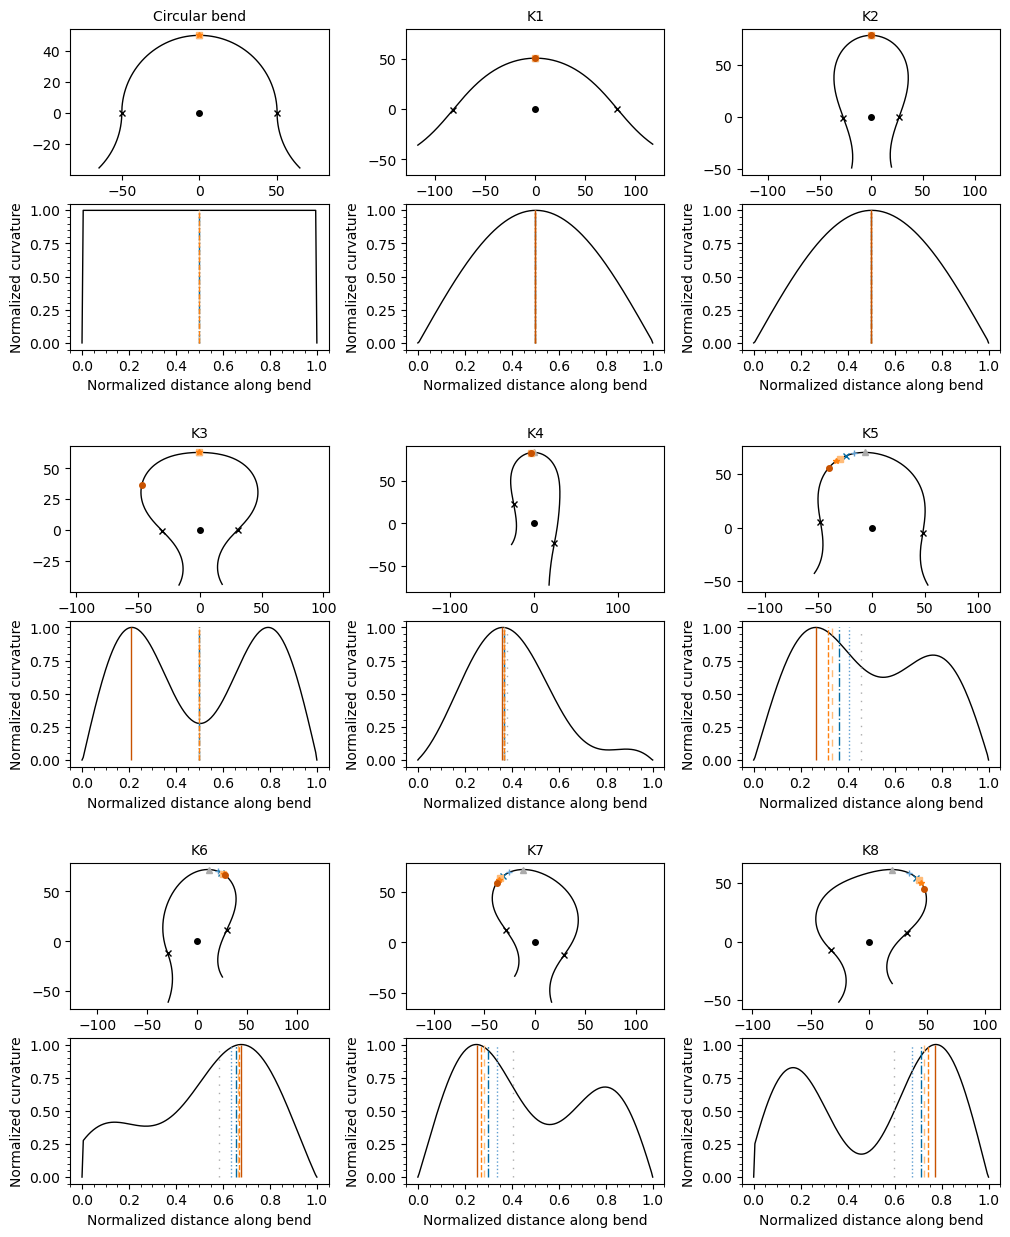

In [16]:
fig = plt.figure(figsize=(12, 15))
plt.style.use('tableau-colorblind10')
outer = gridspec.GridSpec(3, 3, wspace=0.3, hspace=0.3)
for i, coords in enumerate(bend_coords):
    curvature0 = cpf.compute_curvature(coords) 
    inflection_indexes = cpf.find_inflection_points(curvature0, 2)
    i_inflex1 = inflection_indexes[0]
    i_inflex2 = inflection_indexes[-1]

    # get bend points and translate it to get its center at (0,0)
    bend = np.copy(coords[i_inflex1:i_inflex2+1])
    pt_center = (bend[0] + bend[-1]) / 2.
    bend -= pt_center

    # get normalized curvilinear abscissa (abscissa at upstream inflection point s_up=0)
    curv_abs = cpf.compute_cuvilinear_abscissa(bend)
    curv_abs_norm = curv_abs / np.max(curv_abs)
    # normalize curvature
    curvature = np.abs(curvature0[i_inflex1:i_inflex2+1])
    curv_norm = (curvature - np.min(curvature)) / (np.max(curvature) - np.min(curvature))
    
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.2, hspace=0.2)
    ax0 = plt.Subplot(fig, inner[0])
    ax0.plot(coords[:,0]-pt_center[0], coords[:,1]-pt_center[1], 'k-', linewidth=1)
    ax0.plot(bend[0,0], bend[0,1], 'kx', markersize=4)
    ax0.plot(bend[-1,0], bend[-1,1], 'kx', markersize=4)
    ax0.plot(0., 0., 'ko', markersize=4)
    
    ax0.axis('equal')
    ax0.set_title(bend_names[i], fontsize=10)

    fig.add_subplot(ax0)
    ax1 = plt.Subplot(fig, inner[1])
    ax1.plot(curv_abs_norm, curv_norm, 'k-', label="Curvature", linewidth=1, alpha=1)
    ax1.set_ylabel("Normalized curvature")
    ax1.set_xlabel("Normalized distance along bend")

    for j in range(6):
        n = j+1
        label=n_labels[j]
        col = n_colors[j]
        ls = n_linestyles[j]
        if np.isfinite(df_synth.loc[i, ("Apex_index", n)]):
            apex_index = int(df_synth.loc[i, ("Apex_index", n)])
            ax0.plot(bend[apex_index][0], bend[apex_index][1], marker=n_apex_markers[j], color=col, markersize=4)
            ax1.vlines(curv_abs_norm[apex_index], 0, 1, label=label, linewidth=1, linestyle=ls, color=col)

    #ax1.vlines(df_synth.loc[i, ("Apex_index", 1)], 0, 1, label="mean", linewidth=1, linestyle=ls, color='k')
   
    ax1.minorticks_on()
    #ax1.legend(ncol=2, loc='lower center')
    fig.add_subplot(ax1)

plt.savefig(fig_path + "synthetic_bends.png", dpi=150)
plt.show()

Spearman coeff: SignificanceResult(statistic=0.8306277919354926, pvalue=0.002777711899264489)
Kendall coeff: SignificanceResult(statistic=0.6672976811635084, pvalue=0.007198989393205724)

Spearman coeff: SignificanceResult(statistic=0.8645309671165333, pvalue=0.0013161859224169212)
Kendall coeff: SignificanceResult(statistic=0.7253235664820744, pvalue=0.003907312344346942)

Spearman coeff: SignificanceResult(statistic=0.8767942266815112, pvalue=0.000956124073047325)
Kendall coeff: SignificanceResult(statistic=0.7660323462854264, pvalue=0.002699855166564807)

Spearman coeff: SignificanceResult(statistic=0.8814825547070536, pvalue=0.0008387109683109079)
Kendall coeff: SignificanceResult(statistic=0.7833494518006403, pvalue=0.0020344256631821835)

Spearman coeff: SignificanceResult(statistic=0.8814825547070536, pvalue=0.0008387109683109079)
Kendall coeff: SignificanceResult(statistic=0.7833494518006403, pvalue=0.0020344256631821835)

Spearman coeff: SignificanceResult(statistic=0.63474191

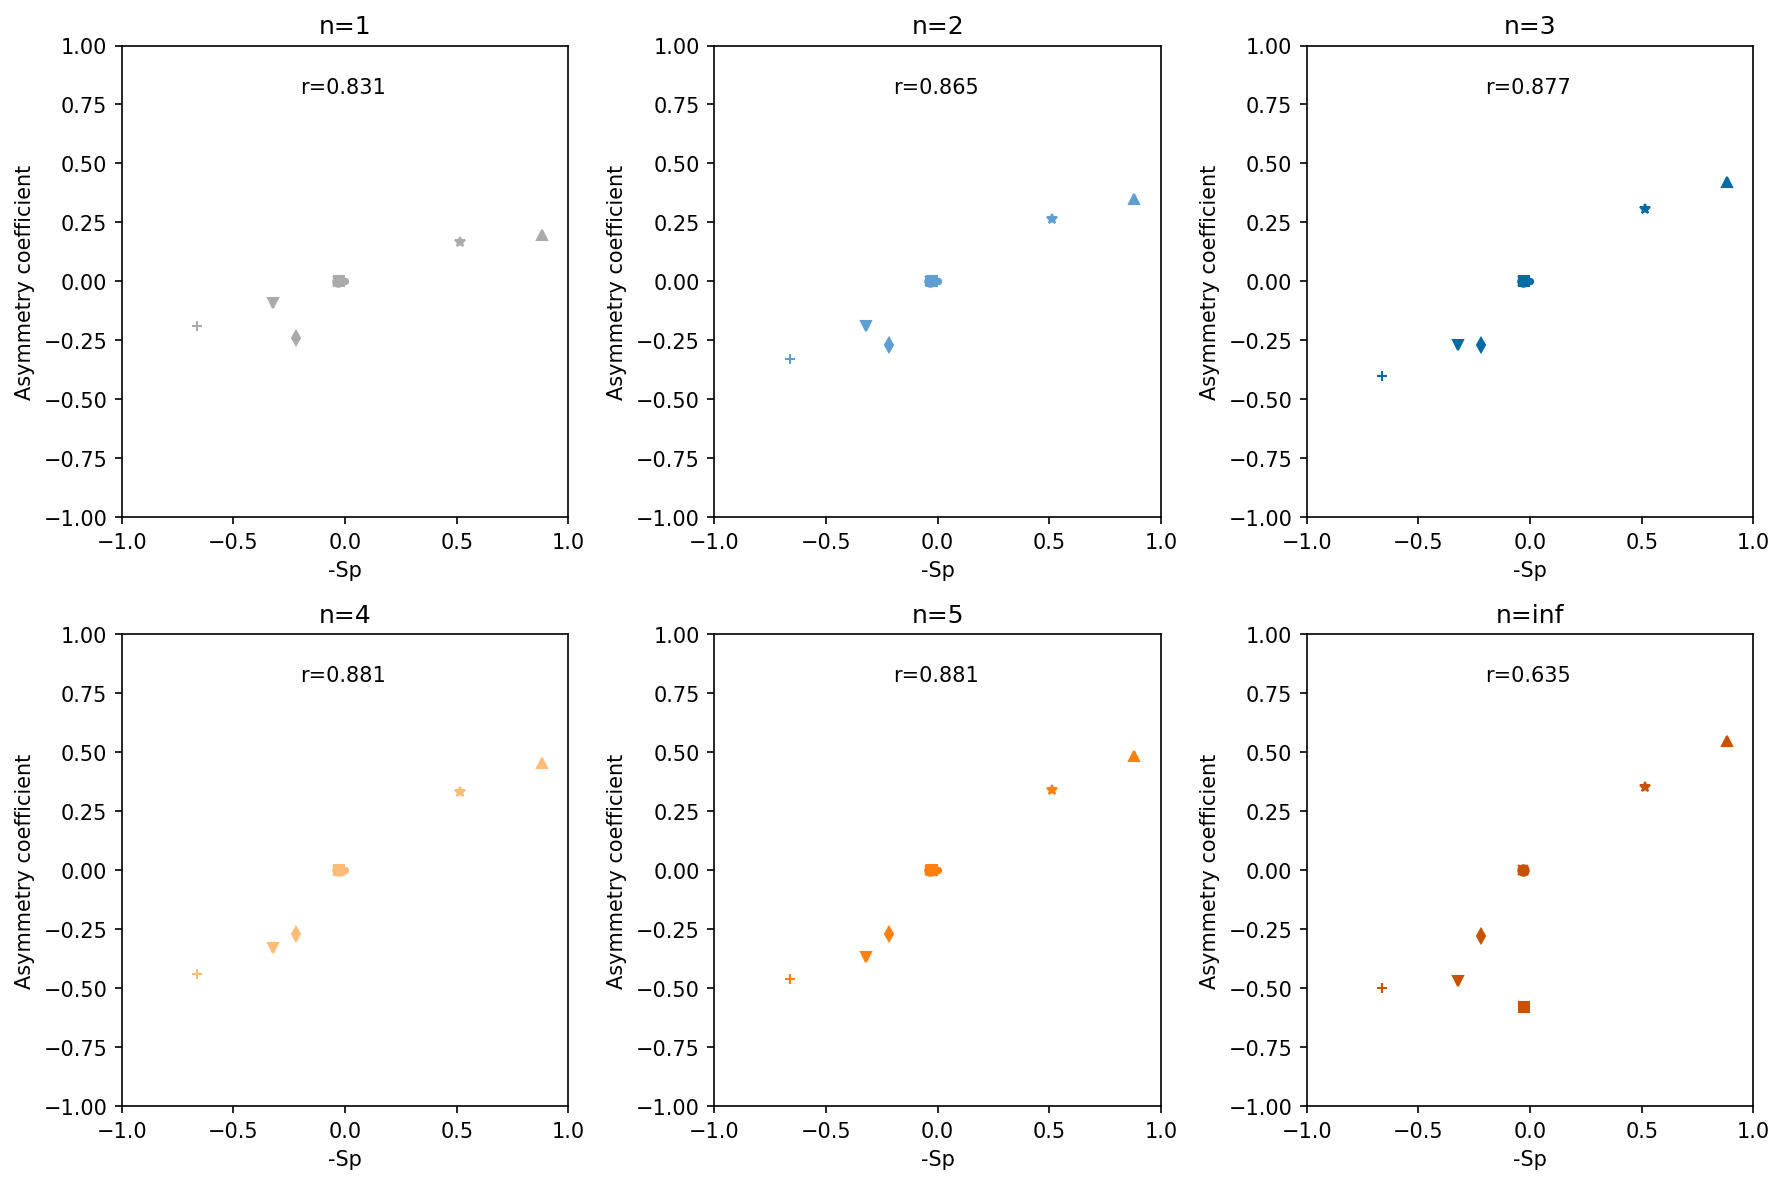

In [17]:
from scipy.stats import kendalltau, pearsonr, spearmanr

correl_coeff_all_synth = np.full(6, np.nan)

fig, axes = plt.subplots(2, 3, dpi=150, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    n = i+1
    for j in range(skew_pearson_all_synth.size):
        ax.plot(skew_pearson_all_synth[j], df_synth["Asymmetry", n][j], marker=bend_markers[j], color=n_colors[i], markersize=5)
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    ax.set_xlabel("-Sp")
    ax.set_ylabel("Asymmetry coefficient")
    ax.set_title(f"{n_labels[i]}") 

    correl_coeff_all_synth[i] = spearmanr(skew_pearson_all_synth, df_synth["Asymmetry", n], nan_policy='omit', alternative='greater')[0]

    ax.text(-0.2, 0.8, f"r={round(correl_coeff_all_synth[i], 3)}")
    
    print(f"Spearman coeff: {spearmanr(skew_pearson_all_synth, df_synth["Asymmetry", n], nan_policy='omit', alternative='greater')}")   # Spearman's rho
    print(f"Kendall coeff: {kendalltau(skew_pearson_all_synth, df_synth["Asymmetry", n], nan_policy='omit', alternative='greater')}")  # Kendall's tau
    print()

plt.tight_layout()
plt.savefig(fig_path + "skewness_correlation_synth_bend.png", dpi=150)
plt.show()

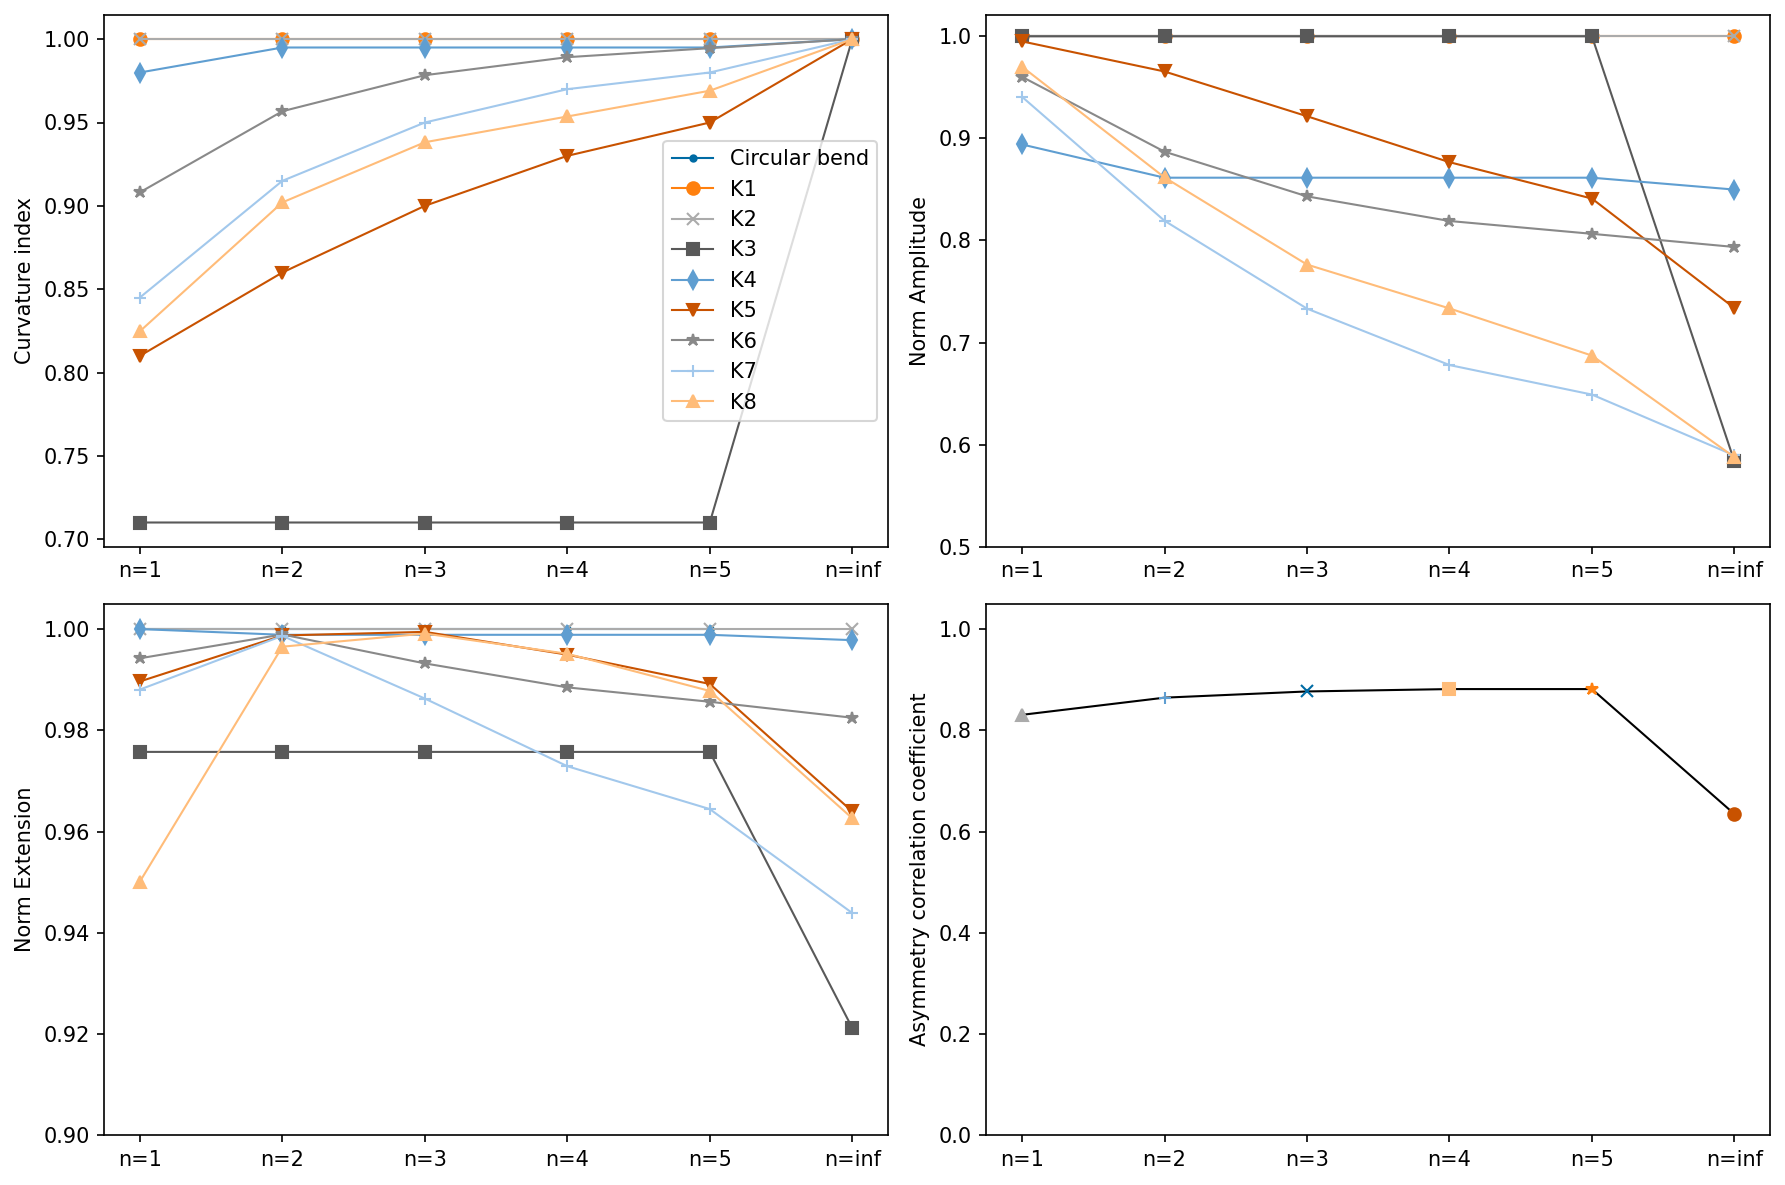

In [18]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, dpi=150, figsize=(12, 8))
xticks = np.arange(df_synth["Apex_index"].shape[1])
for i, row in df_synth.iterrows():
    if row["Distance_Max_Curv"].size > 0:
        ax0.plot(xticks, row["Distance_Max_Curv"], '-',label=bend_names[i], marker=bend_markers[i], linewidth=1, markersize=6)
    ax1.plot(xticks, row["Amplitude"], '-',label=bend_names[i], marker=bend_markers[i], linewidth=1, markersize=6)
    ax2.plot(xticks, row["Extension"], '-',label=bend_names[i], marker=bend_markers[i], linewidth=1, markersize=6)
   
ax0.set_ylabel("Curvature index")
ax0.set_xticks(xticks, n_labels)

ax1.set_ylim(0.5)
ax1.set_ylabel("Norm Amplitude")
ax1.set_xticks(xticks, n_labels)

ax2.set_ylim(0.9, 1.005)
ax2.set_ylabel("Norm Extension")
ax2.set_xticks(xticks, n_labels)

ax3.plot(xticks, correl_coeff_all_synth, 'k-', linewidth=1)
for i, val in enumerate(correl_coeff_all_synth):
    ax3.plot(xticks[i], val, marker=n_apex_markers[i], color=n_colors[i], markersize=6)
    
ax3.set_ylabel("Asymmetry correlation coefficient")
ax3.set_xticks(xticks, n_labels)
ax3.set_ylim(0.0, 1.05)

ax0.legend()
fig.tight_layout()
plt.savefig(fig_path + "synthetic_bends_morphometry.png", dpi=150)
plt.show()

## Natural bends analysis
Natural river dataset consisted of meandering rivers from the Amazon Basin and is from the database established by Sylvester et al. (2019)  accessible on https://github.com/zsylvester/curvaturepy/tree/master. Dataset includes 10 river reaches and only the most recent centerline was used for this study.

The following cell clones in the ".outputs" directory the csv files from the GitHub repository by Zoltan Sylvester containing the dataset.

In [6]:
%%bash
cd ./.outputs/
git clone -n --depth=1 --filter=tree:0 https://github.com/zsylvester/curvaturepy.git
cd ./curvaturepy/
git sparse-checkout set --no-cone "/data/Jurua/csv_files/Jurua_20170710.csv"
git sparse-checkout add "/data/Jurua_2/csv_files/Jurua_2_20160815.csv"
git sparse-checkout add "/data/Jutai/csv_files/Jutai_20170802.csv"
git sparse-checkout add "/data/Mamore/csv_files/Mamore_19900524.csv"
git sparse-checkout add "/data/Purus/csv_files/Purus_20170804.csv"
git sparse-checkout add "/data/Purus_2/csv_files/Purus_2_20170728.csv"
git sparse-checkout add "/data/Tarauaca/csv_files/Tarauaca_20170724.csv"
git sparse-checkout add "/data/Tarauaca/csv_files/Tarauaca_Jurua_20170724.csv"
git sparse-checkout add "/data/Yavari/csv_files/Yavari_20160813.csv"
git sparse-checkout add "/data/Yavari/csv_files/Yavari_tributary_1_20160813.csv"
git checkout

Cloning into 'curvaturepy'...


Your branch is up to date with 'origin/master'.


This cell loads centreline data. During the loading, bends are automatically detected.

In [19]:
import functools
from concurrent.futures import ProcessPoolExecutor as Pool

from pybend.model.Bend import Bend
from pybend.model.Centerline import Centerline
from pybend.utils.globalParameters import set_nb_procs
from pybend.utils.logging import logger, WARNING
import pybend.algorithms.pybend_io as io

# disable logger info message
logger.setLevel(WARNING)
def load_centerlines(use_fix_nb_points,
                     smoothing_window,
                     sinuo_thres,
                     n,
                     compute_curvature,
                     interpol_props,
                     find_bends,
                     root,
                     path):
  width = path[1]
  spacing :float = width / 3  # spacing between channel point
  smooth_distance :float = 5*spacing # channel point location smoothing distance

  centerline_df = io.load_centerline_dataset_from_csv(
      root + path[0],
      x_prop = "centerline_x_corrected",
      y_prop = "centerline_y_corrected",
      sep = ",",
      drop_columns=("order","group","centerline_x","centerline_y","right_bank_x","right_bank_y","left_bank_x","left_bank_y"))
  centerline = Centerline(0,
                          centerline_df,
                          spacing,
                          smooth_distance,
                          use_fix_nb_points,
                          smoothing_window,
                          sinuo_thres,
                          n,
                          compute_curvature,
                          interpol_props,
                          find_bends,
                         )

  # define apex as maximum curvature point
  centerline.find_all_bend_apex_user_weights(apex_proba_weights=(1.,0.,0.))

  index = path[0].rfind('/')
  name = path[0][index+1:-4]
  print(f"Number of bends ({name}): {centerline.get_nb_bends()}")
  print(f"Number of bends where s>1.1 ({name}): {centerline.get_nb_valid_bends()}")
  return centerline
    
# number of processors to use
nb_procs = 5
set_nb_procs(nb_procs)

# inputs
data_root = str(os.path.join(os.getcwd(), ".outputs/curvaturepy/data/"))
map_file_LC = {
    "Jurua_2017": ("Jurua/csv_files/Jurua_20170710.csv", 266.),
    "Jurua2_2016": ("Jurua_2/csv_files/Jurua_2_20160815.csv", 200.),
    "Jutai_2017": ("Jutai/csv_files/Jutai_20170802.csv", 200.),
    "Mamore_1990": ("Mamore/csv_files/Mamore_19900524.csv", 400.),
    "Purus_2017": ("Purus/csv_files/Purus_20170804.csv", 250.),
    "Purus2_2017": ("Purus_2/csv_files/Purus_2_20170728.csv", 310.),
    "Tarauaca_2017": ("Tarauaca/csv_files/Tarauaca_20170724.csv", 120.),
    "Tarauaca_Jurua_2017": ("Tarauaca/csv_files/Tarauaca_Jurua_20170724.csv", 150.),
    "Yavari_2017": ("Yavari/csv_files/Yavari_20160813.csv", 160.),
    "Yavari_tributary_2016": ("Yavari/csv_files/Yavari_tributary_1_20160813.csv", 100.),
}

# import parameters
use_fix_nb_points :bool = False # if True, centerline is discretized using a fix number of points given by spacing parameter
smoothing_window :int = 40  # number of points for smooth curvature
sinuo_thres :float = 1.1  # sinuosity threshold for bends
n: float = 2. # exponent of curvature probability function
compute_curvature :bool = True
interpol_props :bool = True
find_bends :bool = True

print("Centerlines loading in progress...")
# create partial function for multiprocessing
partial_load = functools.partial(
                load_centerlines, use_fix_nb_points, smoothing_window, sinuo_thres, n,
                compute_curvature, interpol_props, find_bends, data_root
            )

nb_valid_bends = 0
# multiprocessing
with Pool(max_workers=nb_procs) as pool:
    inputs = [path for path in map_file_LC.values()]
    outputs = pool.map(partial_load,
                       inputs)

    centerlines = []
    for age, centerline in zip(inputs, outputs):
        centerlines.append(centerline)
        nb_valid_bends += centerline.get_nb_valid_bends()

print("Centerlines successfully loaded")
print(f"Total number of valid bends: {nb_valid_bends}")

Number of bends (Mamore_19900524): 117
Number of bends where s>1.1 (Mamore_19900524): 90
Number of bends (Jurua_2_20160815): 118
Number of bends where s>1.1 (Jurua_2_20160815): 69
Number of bends (Purus_20170804): 145
Number of bends where s>1.1 (Purus_20170804): 86
Number of bends (Jurua_20170710): 143
Number of bends where s>1.1 (Jurua_20170710): 98
Number of bends (Jutai_20170802): 218
Number of bends where s>1.1 (Jutai_20170802): 172
Number of bends (Purus_2_20170728): 112
Number of bends where s>1.1 (Purus_2_20170728): 77
Number of bends (Tarauaca_20170724): 207
Number of bends where s>1.1 (Tarauaca_20170724): 157
Number of bends (Yavari_tributary_1_20160813): 187
Number of bends where s>1.1 (Yavari_tributary_1_20160813): 134
Number of bends (Yavari_20160813): 302
Number of bends where s>1.1 (Yavari_20160813): 216
Number of bends (Tarauaca_Jurua_20170724): 296
Number of bends where s>1.1 (Tarauaca_Jurua_20170724): 189
centerlines loaded
Total number of valid bends: 1288


Plot centerline and bends trajectories.

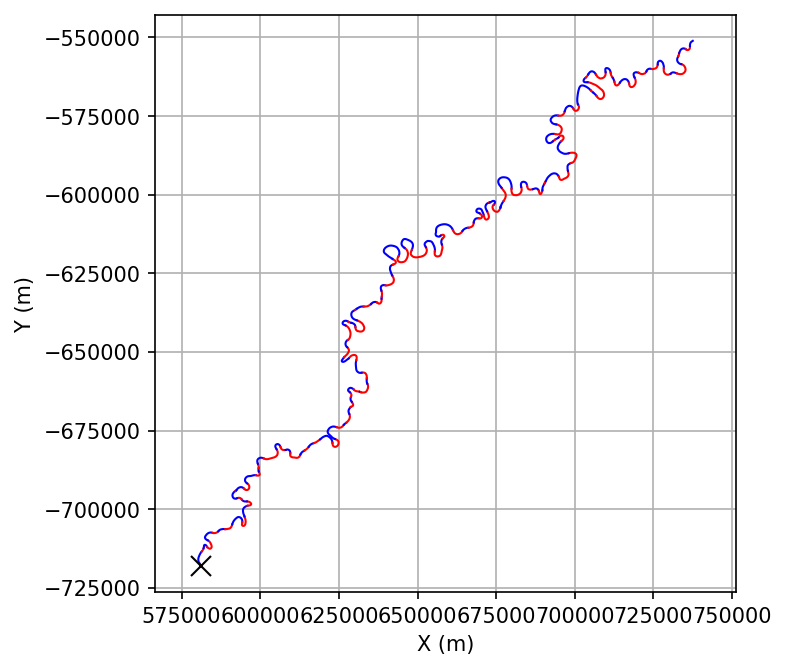

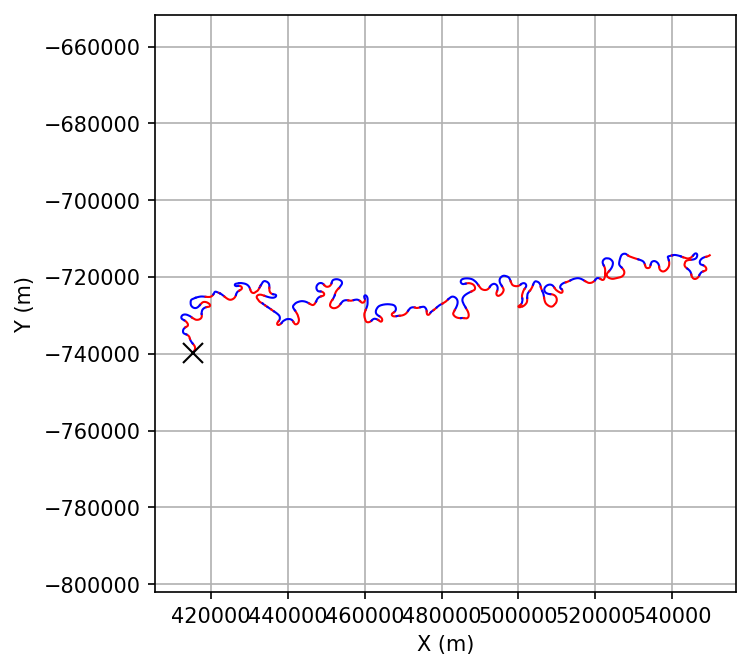

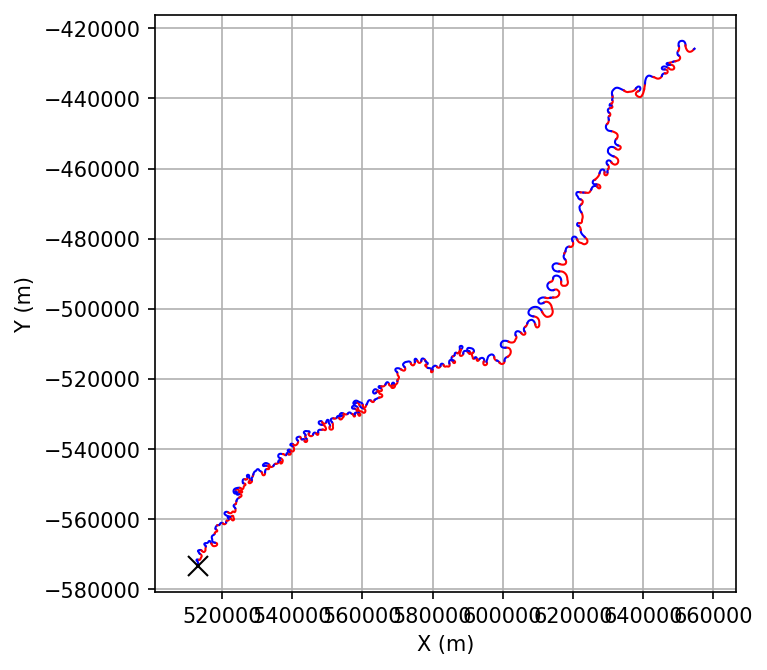

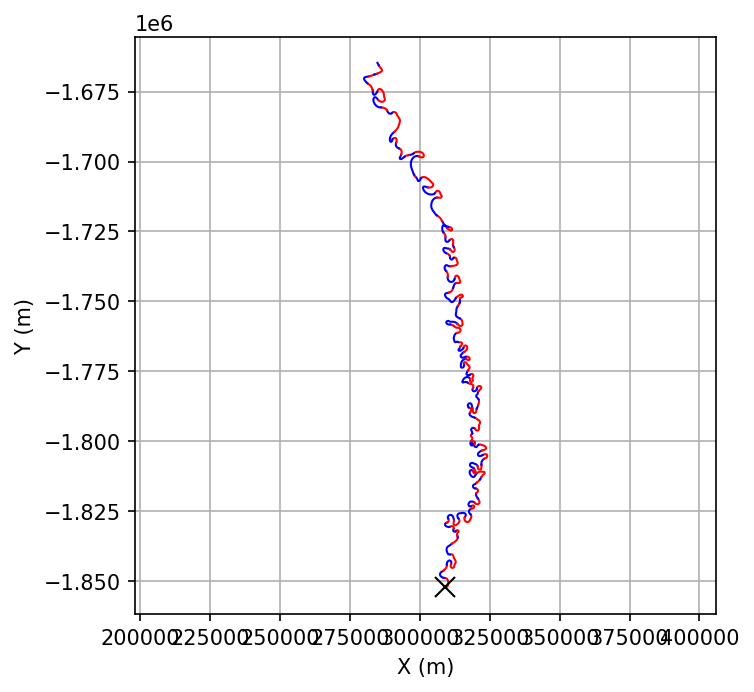

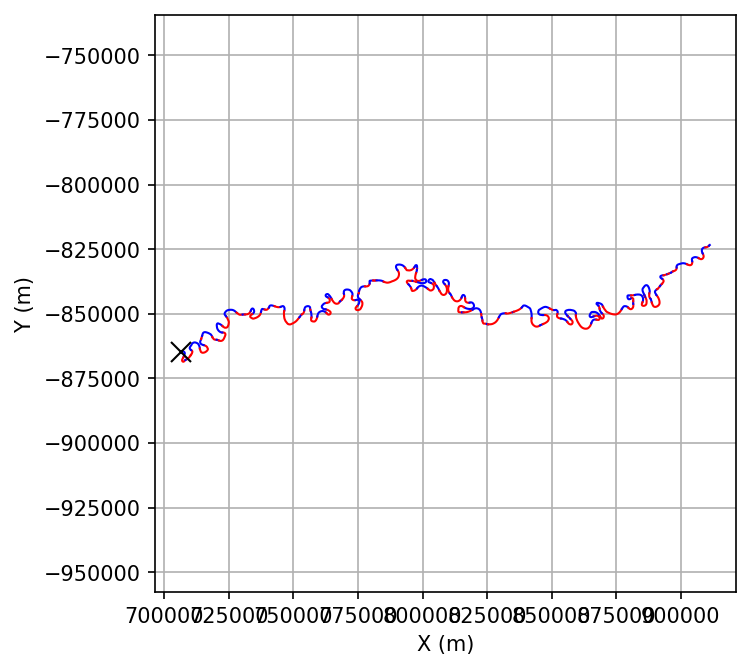

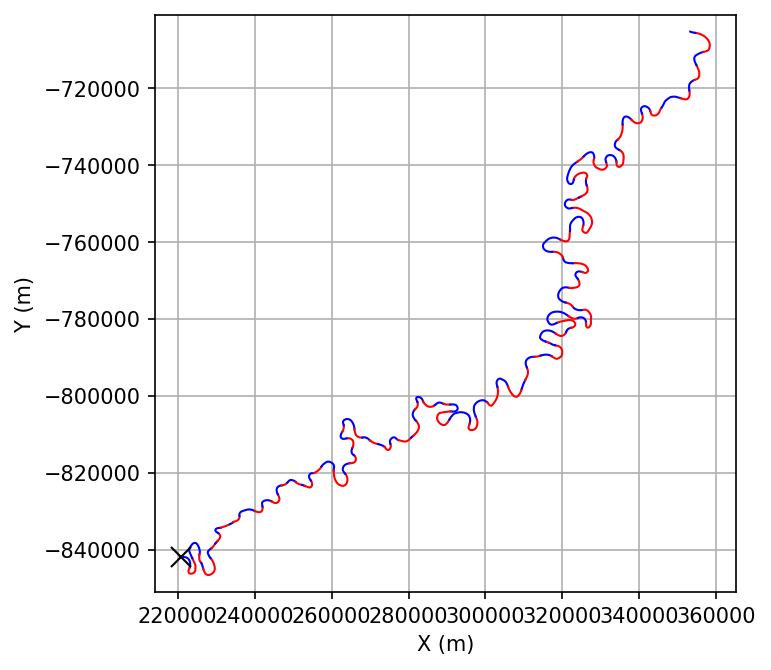

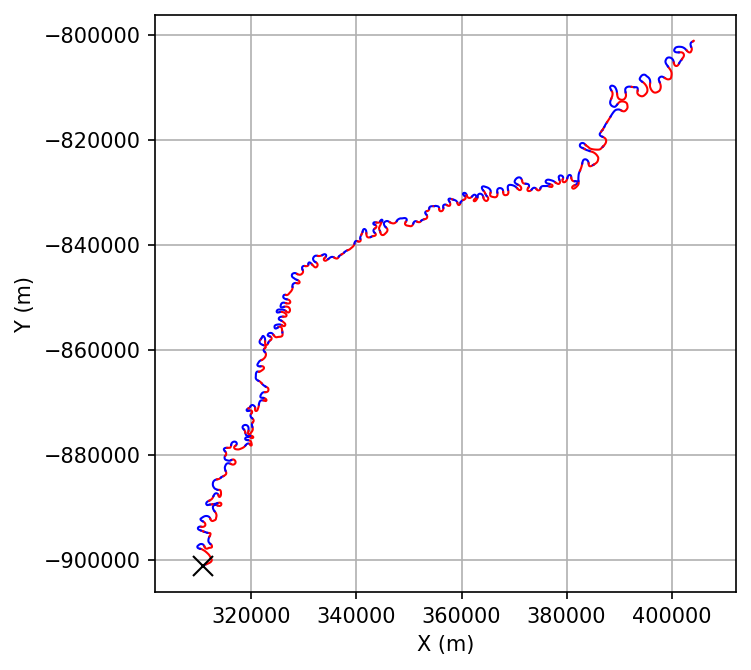

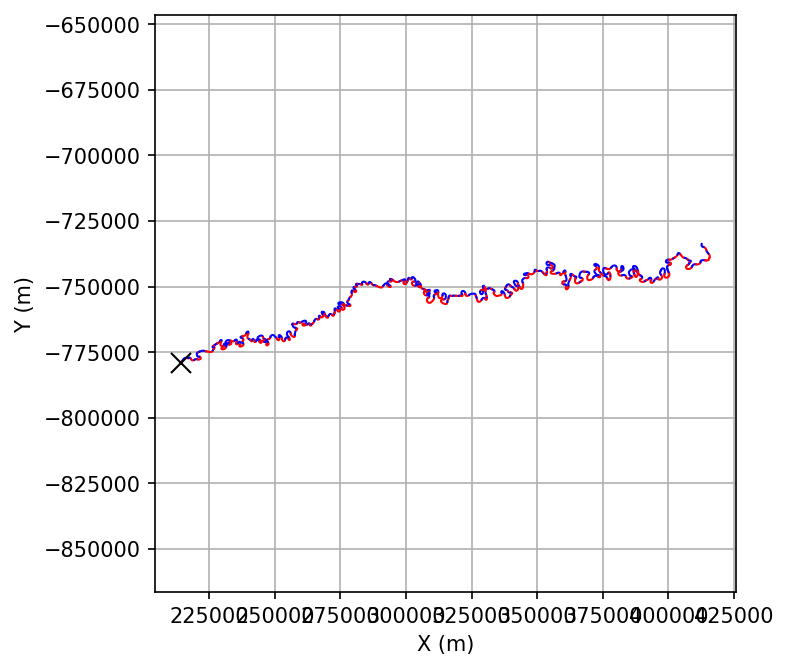

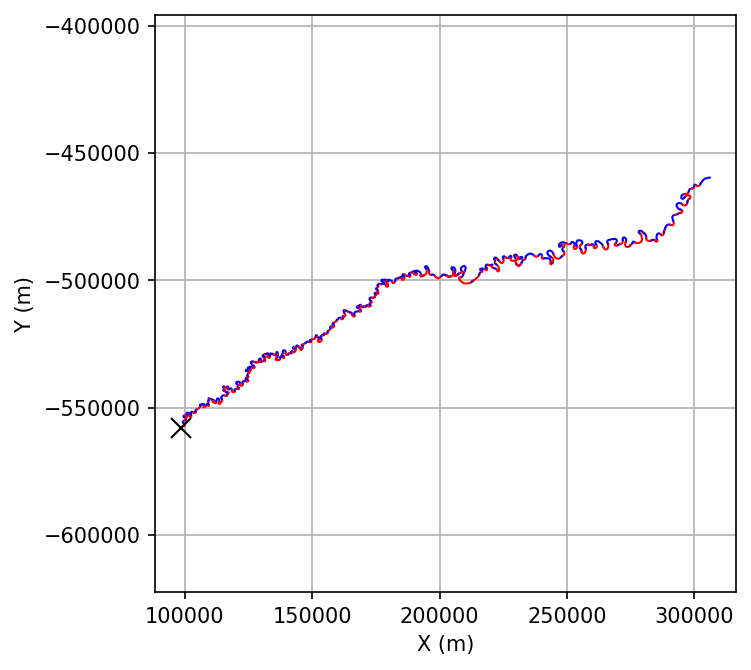

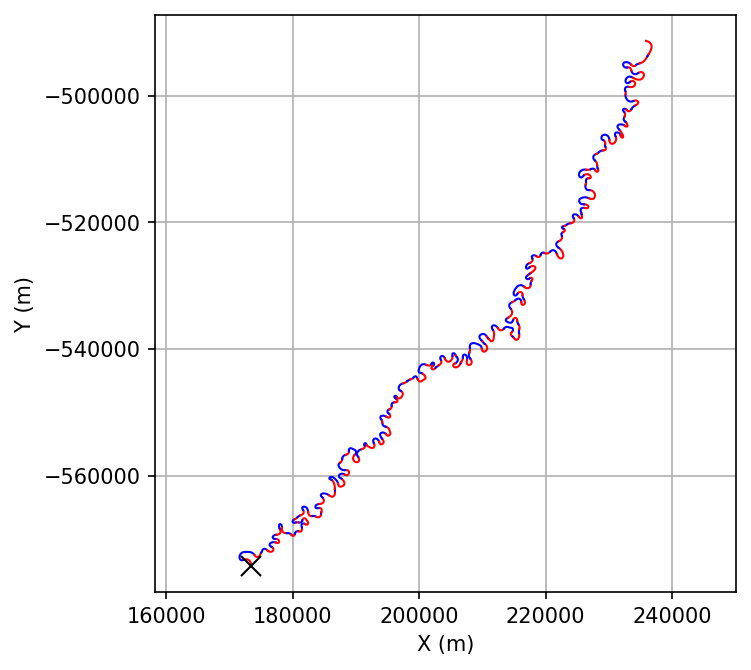

In [11]:
import pybend.algorithms.plot_functions as plot

# set to True to plot each individual bend (WARNING! may take some time)
plot_bends = False 
domain = ([],[])
cpt = 0
for i, centerline in enumerate(centerlines):
    plot.plot_centerline_single(
            fig_path + "centerline_%s.png"%i,
            (centerline.cl_points,),
            centerline.bends,
            domain,
            show=True,
            plot_apex=False,
            plot_inflex=False,
            plot_middle=False,
            plot_centroid=False,
            color_bend=True,
        )
    plt.show()
    plt.close()

    # plot each individual valid bend trajectory
    for bend in centerline.bends:
        if plot_bends and bend.isvalid:
            fig, ax0 = plt.subplots(1, 1, dpi=150)
            plot.plot_bends(ax0, (centerline.cl_points,), (bend,), ([],[]), plot_middle=False,
                              plot_property=False, rotate=True)
            
            ax0.axis('equal')
            ax0.set_xlabel("X (m)")
            ax0.set_ylabel("Y (m)")
            ax0.set_title("Bend %s"%cpt)
            plt.savefig(fig_path + "bend_%s.png"%cpt, dpi=150)
            plt.close()
    
        cpt += 1

### Compute apex location according to *n* from filtered curvature 

Compute apex location (same window size as for bend detection) and plot selected bends trajectory and curvature distributions.

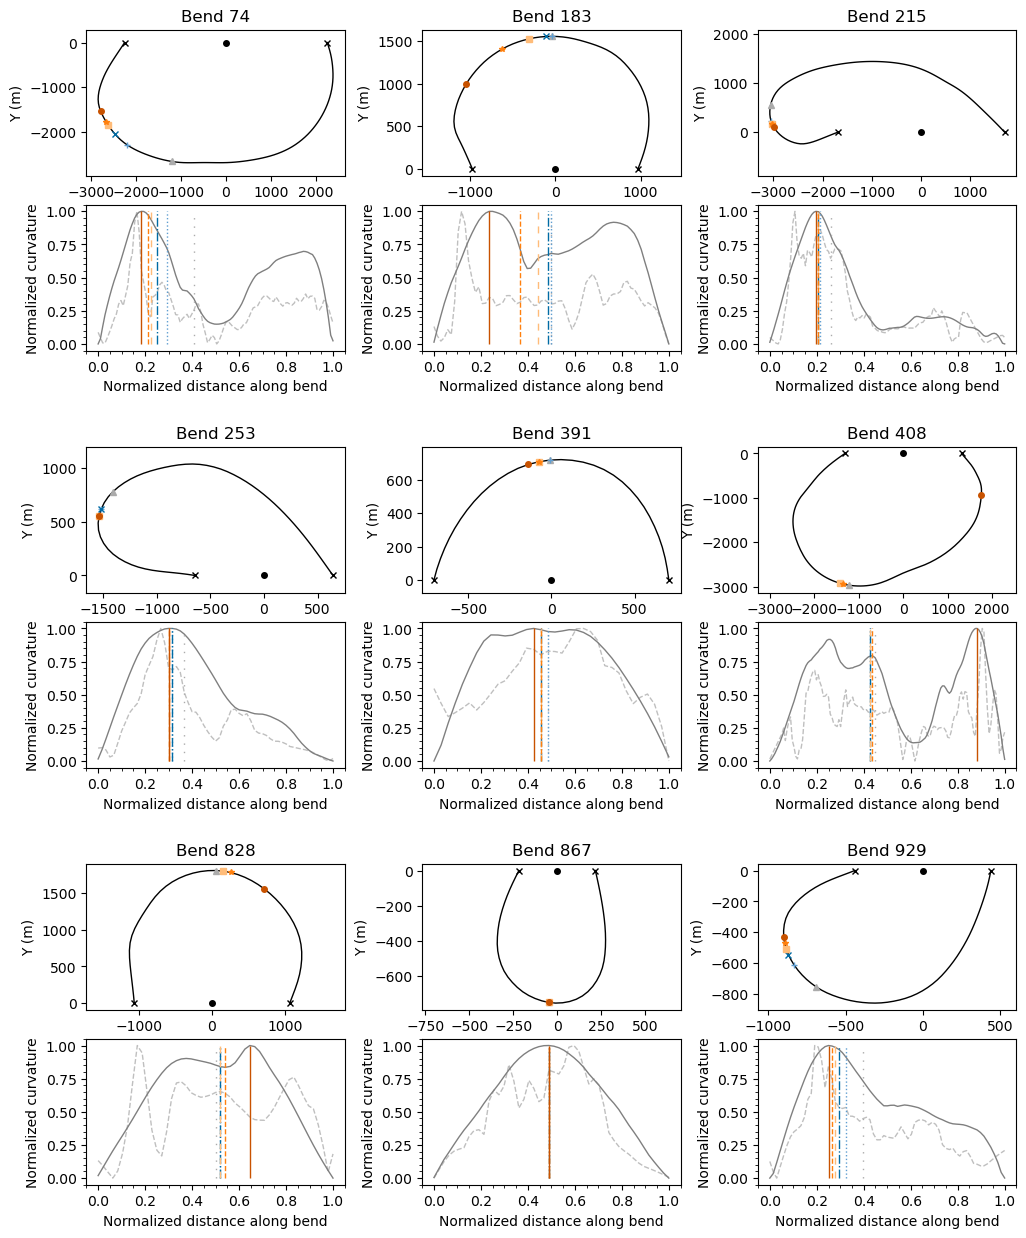

In [12]:
fig = plt.figure(figsize=(12, 15))
outer = gridspec.GridSpec(3, 3, wspace=0.3, hspace=0.3)
k = 0
cpt = 0

nb_col = len(df_names[0])*len(df_names[1])
df = pd.DataFrame(np.full((int(nb_valid_bends), nb_col), np.nan), 
                  columns=df_indexes)
df_index = -1

# extract bend apex
skew_pearson_all = np.full(int(nb_valid_bends), np.nan)
sinuosity_all = np.full(int(nb_valid_bends), np.nan)
for centerline in centerlines:
    for bend in centerline.bends:
        if not bend.isvalid:
            cpt += 1
            continue

        df_index += 1
        coords = [cl_pt.pt[:2] for cl_pt in centerline.cl_points[bend.index_inflex_up:bend.index_inflex_down+1]]

        # translate+rotate bends for the center to be at (0,0)
        pt_center = (coords[-1] + coords[0]) / 2.
        coords -= pt_center        
        
        vec_inflex = coords[-1] - coords[0]
        vec_inflex /=  np.linalg.norm(vec_inflex)
        cos = np.dot(vec_inflex, np.array([1., 0.]))
        vec_inflex2 = np.array([vec_inflex[1], -vec_inflex[0]])
        sin = np.dot(vec_inflex2, np.array([1., 0.]))
        # rotate x,y coordinates
        rot = np.array([[cos, -sin], [sin, cos]])
        coords = np.dot(coords, rot)
        
        # compute bend apex and morphometric parameters for multiple n
        curv_abs = centerline.get_bend_property(bend.id, "Curv_abscissa")
        curv_abs_norm = (curv_abs - curv_abs.min()) / (curv_abs.max() - curv_abs.min())
        curvature = np.abs(centerline.get_bend_property(bend.id, "Curvature_filtered"))
        curvature_raw = np.abs(centerline.get_bend_property(bend.id, "Curvature"))
        
        pt_center = np.array([0,0])
        ampl_max = np.max([cpf.orthogonal_distance(pt, coords[0], coords[-1]) for pt in coords])

        extension_max = np.max([cpf.distance(pt, pt_center) for pt in coords])
        d_inflex = cpf.distance(coords[0], coords[-1])

        max_curv_index = np.argmax(curvature)
        pt_max_curv = coords[max_curv_index]

        arc_length_tot = curv_abs_norm[-1] - curv_abs_norm[0]

        mean_abs = cpf.compute_esperance(curvature, curv_abs_norm, 1)
        std_dev = cpf.compute_variance(curvature, curv_abs_norm, 1)[1]
        apex_index = cpf.compute_median_curvature_index(curvature, 1)
        skew_pearson = 3*(mean_abs - curv_abs_norm[apex_index]) / std_dev
        skew_pearson_all[df_index] = -1. * skew_pearson
        sinuosity_all[df_index] = (curv_abs[-1] - curv_abs[0]) / d_inflex
        
        # apex from apex probability function with varying n
        for n in range(1, 6):
            apex_index = cpf.compute_median_curvature_index(curvature, n)
            df.loc[df_index, ("Apex_index", n)] = apex_index
            df.loc[df_index, ("Curv_Abs", n)] = curv_abs_norm[apex_index] - curv_abs_norm[0]
            pt_apex = coords[apex_index]
            
            if (extension_max > 0.51*d_inflex): 
                df.loc[df_index, ("Extension", n)] = cpf.distance(pt_center, pt_apex) / extension_max
                
            df.loc[df_index, ("Amplitude", n)] = cpf.orthogonal_distance(pt_apex, coords[0], coords[-1]) / ampl_max
                
            arc_length1 = curv_abs_norm[apex_index] - curv_abs_norm[0]
            arc_length2 = curv_abs_norm[-1] - curv_abs_norm[apex_index]
            if abs(arc_length_tot) > 1e-3:
                df.loc[df_index, ("Asymmetry", n)] = (arc_length1 - arc_length2) / arc_length_tot

            # distance to max curvature point
            if abs(arc_length_tot) > 1e-3:
                dist_max_cuvr = abs(curv_abs_norm[apex_index] - curv_abs_norm[max_curv_index]) / arc_length_tot
                df.loc[df_index, ("Distance_Max_Curv", n)] = 1-dist_max_cuvr

        # add max curvature point
        df.loc[df_index, ("Apex_index", 6)] = max_curv_index
        df.loc[df_index, ("Curv_Abs", 6)] = curv_abs_norm[max_curv_index] - curv_abs_norm[0]
        df.loc[df_index, ("Extension", 6)] = cpf.distance(pt_center, pt_max_curv) / extension_max
        df.loc[df_index, ("Amplitude", 6)] = cpf.orthogonal_distance(pt_max_curv, coords[0], coords[-1]) / ampl_max
        arc_length1 = curv_abs_norm[max_curv_index] - curv_abs_norm[0]
        arc_length2 = curv_abs_norm[-1] - curv_abs_norm[max_curv_index]
        if abs(arc_length_tot) > 1e-3:
            df.loc[df_index, ("Asymmetry", 6)] = (arc_length1 - arc_length2) / arc_length_tot
        df.loc[df_index, ("Distance_Max_Curv", 6)] = 1.
               
        # show some characteristic bends       
        if cpt in ((74, 183, 253, 391, 408, 828, 867, 929, 215)):
            inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[k], wspace=0.2, hspace=0.2)
            
            ax0 = plt.Subplot(fig, inner[0])
            ax0.plot(coords[:,0], coords[:,1], 'k-', linewidth=1)
            ax0.plot(coords[0,0], coords[0,1], 'kx', markersize=4)
            ax0.plot(coords[-1,0], coords[-1,1], 'kx', markersize=4)
            ax0.plot(pt_center[0], pt_center[1], 'ko', markersize=4)               
            ax0.axis('equal')
            ax0.set_xlabel("X (m)")
            ax0.set_ylabel("Y (m)")
            ax0.set_title(f"Bend {cpt}")
        
            curv_norm = (curvature - np.min(curvature)) / (np.max(curvature) - np.min(curvature))
            curv_norm_raw = (curvature_raw - np.min(curvature_raw)) / (np.max(curvature_raw) - np.min(curvature_raw))
            ax1 = plt.Subplot(fig, inner[1])
            ax1.plot(curv_abs_norm, curv_norm, 'k-', label="Curvature Filtered", linewidth=1, alpha=0.5)
            ax1.plot(curv_abs_norm, curv_norm_raw, '--', color='grey', label="Curvature Raw", linewidth=1, alpha=0.5)
            ax1.set_ylabel("Normalized curvature")
            ax1.set_xlabel("Normalized distance along bend")
            
            for j, apex_loc in enumerate(df.loc[df_index, ("Apex_index")].to_numpy().astype(int)):
                ax0.plot(coords[apex_loc][0], coords[apex_loc][1], marker=n_apex_markers[j], color=n_colors[j], markersize=4)
                ax1.vlines(curv_abs_norm[apex_loc], 0, 1, label=n_labels[n-1], linewidth=1, linestyle=n_linestyles[j], color=n_colors[j])
                
            ax1.minorticks_on()
            #ax1.legend(ncol=2, loc='lower center')
            fig.add_subplot(ax0)
            fig.add_subplot(ax1)
            k += 1
            
        cpt += 1

plt.savefig(fig_path + "real_bends.png", dpi=150)
plt.show()

Plot statistical distribution of meander bend sinuosity.

Mean sinuosity: 1.9161882259584708
Median sinuosity: 1.7140632353890297
Min sinuosity: 1.1001994974124047
Max sinuosity: 8.156786589600692


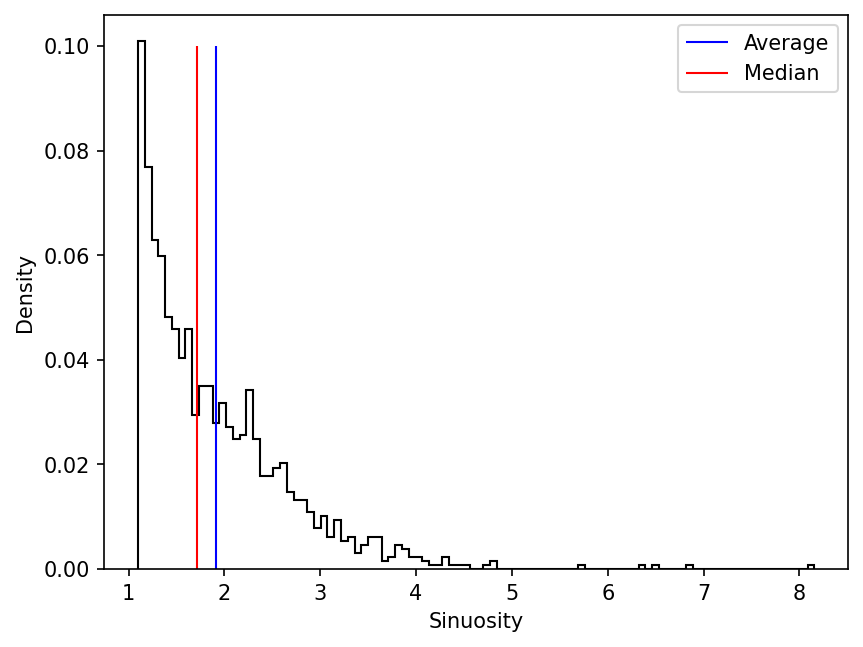

In [13]:
counts, bins = np.histogram(sinuosity_all, bins=100, density=False)
density = counts / np.sum(counts)

print(f"Mean sinuosity: {np.nanmean(sinuosity_all)}")
print(f"Median sinuosity: {np.nanmedian(sinuosity_all)}")
print(f"Min sinuosity: {np.nanmin(sinuosity_all)}")
print(f"Max sinuosity: {np.nanmax(sinuosity_all)}")

plt.figure(dpi=150)
plt.stairs(density, bins, color='k')
plt.vlines(np.nanmean(sinuosity_all), 0, 0.1, 'b', label="Average", linewidth=1)
plt.vlines(np.nanmedian(sinuosity_all), 0, 0.1, 'r', label="Median", linewidth=1)
plt.xlabel("Sinuosity")
plt.ylabel("Density")
plt.legend()
plt.savefig(f"{fig_path}sinuosity_distribution.png", dpi=150)
plt.show()

Show cross-plots of asymmetry coefficient vs skewness coefficient and compute correlation coefficients.

Spearman coeff: SignificanceResult(statistic=0.8831815018275706, pvalue=0.0)
Pearson coeff: PearsonRResult(statistic=0.8987193081573339, pvalue=0.0)
Kendall coeff: SignificanceResult(statistic=0.7095851008894488, pvalue=0.0)

Spearman coeff: SignificanceResult(statistic=0.8547508023171666, pvalue=0.0)
Pearson coeff: PearsonRResult(statistic=0.8909342796929283, pvalue=0.0)
Kendall coeff: SignificanceResult(statistic=0.6805658110005937, pvalue=2.282275962967935e-293)

Spearman coeff: SignificanceResult(statistic=0.8466368522023394, pvalue=0.0)
Pearson coeff: PearsonRResult(statistic=0.8780473304961487, pvalue=0.0)
Kendall coeff: SignificanceResult(statistic=0.6750664794143055, pvalue=1.0979556776153113e-288)

Spearman coeff: SignificanceResult(statistic=0.8447991221290376, pvalue=0.0)
Pearson coeff: PearsonRResult(statistic=0.8668121274172895, pvalue=0.0)
Kendall coeff: SignificanceResult(statistic=0.6746369572456529, pvalue=2.539157776572884e-288)

Spearman coeff: SignificanceResult(sta

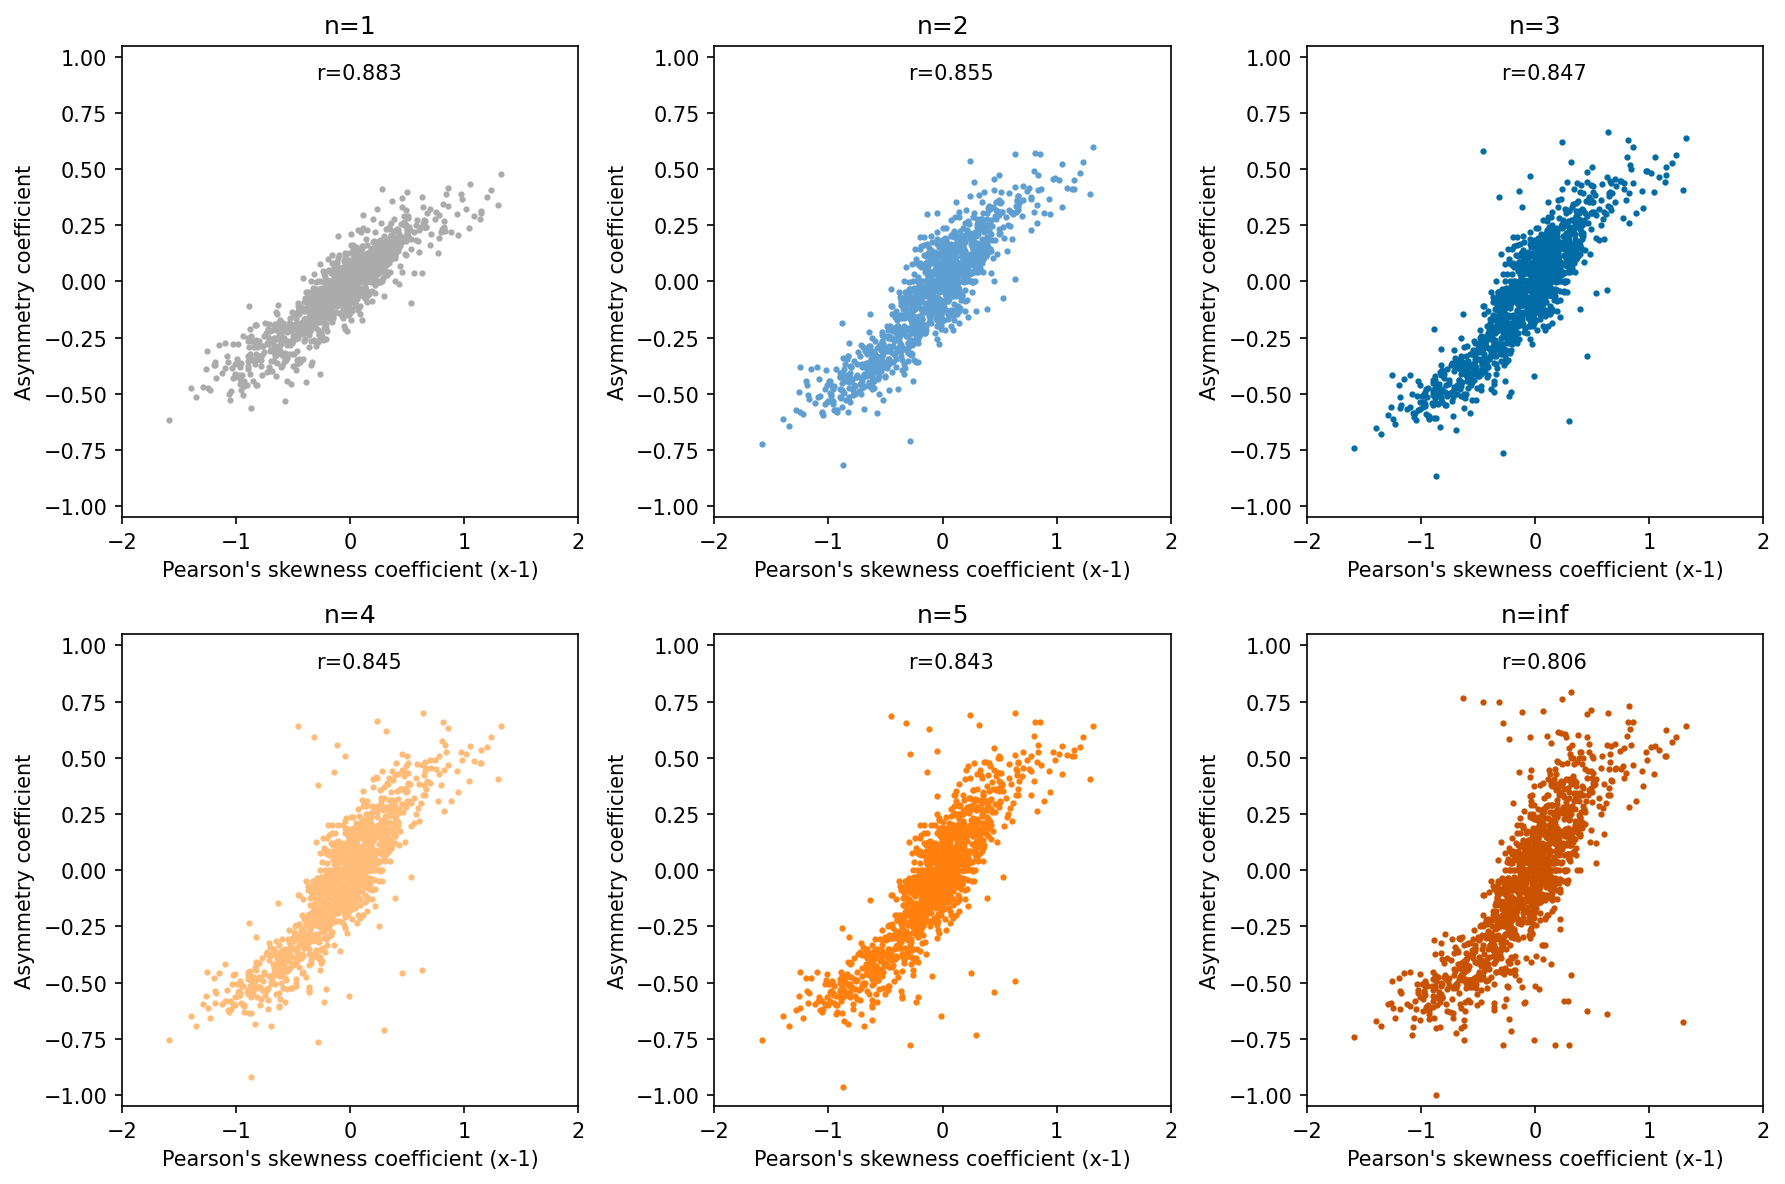

In [14]:
coeff_correl_all = np.full(6, np.nan)
fig, axes = plt.subplots(2, 3, dpi=150, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    n = i+1
    values = df["Asymmetry", n]
    ax.plot(skew_pearson_all, values, 'o', color=n_colors[i], markersize=2)
    ax.set_xlim(-2.0, 2.0)
    ax.set_ylim(-1.05, 1.05)
    ax.set_xlabel("Pearson's skewness coefficient (x-1)")
    ax.set_ylabel("Asymmetry coefficient")
    ax.set_title(f"{n_labels[i]}") 

    sp = spearmanr(skew_pearson_all, values, nan_policy='omit', alternative='greater')
    ax.text(-0.3, 0.9, f"r={round(sp[0], 3)}")
    
    coeff_correl_all[i] = sp[0]
    print(f"Spearman coeff: {sp}")   # Spearman's rho
    print(f"Pearson coeff: {pearsonr(skew_pearson_all, values, alternative='greater')}")  # Kendall's tau
    print(f"Kendall coeff: {kendalltau(skew_pearson_all, values, nan_policy='omit', alternative='greater')}")  # Kendall's tau
    print()

plt.tight_layout()
plt.savefig(fig_path + "skewness_correlation.png", dpi=150)
plt.show()

Display morphological parameters results depending upon apex location.

Distance_Max_Curv for each value of n:
Mean: [0.93485625 0.95579667 0.96631892 0.97212765 0.97608181 1.        ]
Median: [0.95348867 0.96777498 0.97619075 0.98097431 0.98529352 1.        ]

Amplitude for each value of n:
Mean: [0.95557347 0.92625714 0.9094725  0.89964652 0.89340459 0.86607245]
Median: [0.99017146 0.98103999 0.97539457 0.9693609  0.9667082  0.94719906]

Extension for each value of n:
Mean: [0.96266686 0.97274901 0.97372783 0.97366708 0.97322506 0.8717579 ]
Median: [0.98439693 0.99262759 0.99282775 0.99279062 0.99267985 0.96240464]



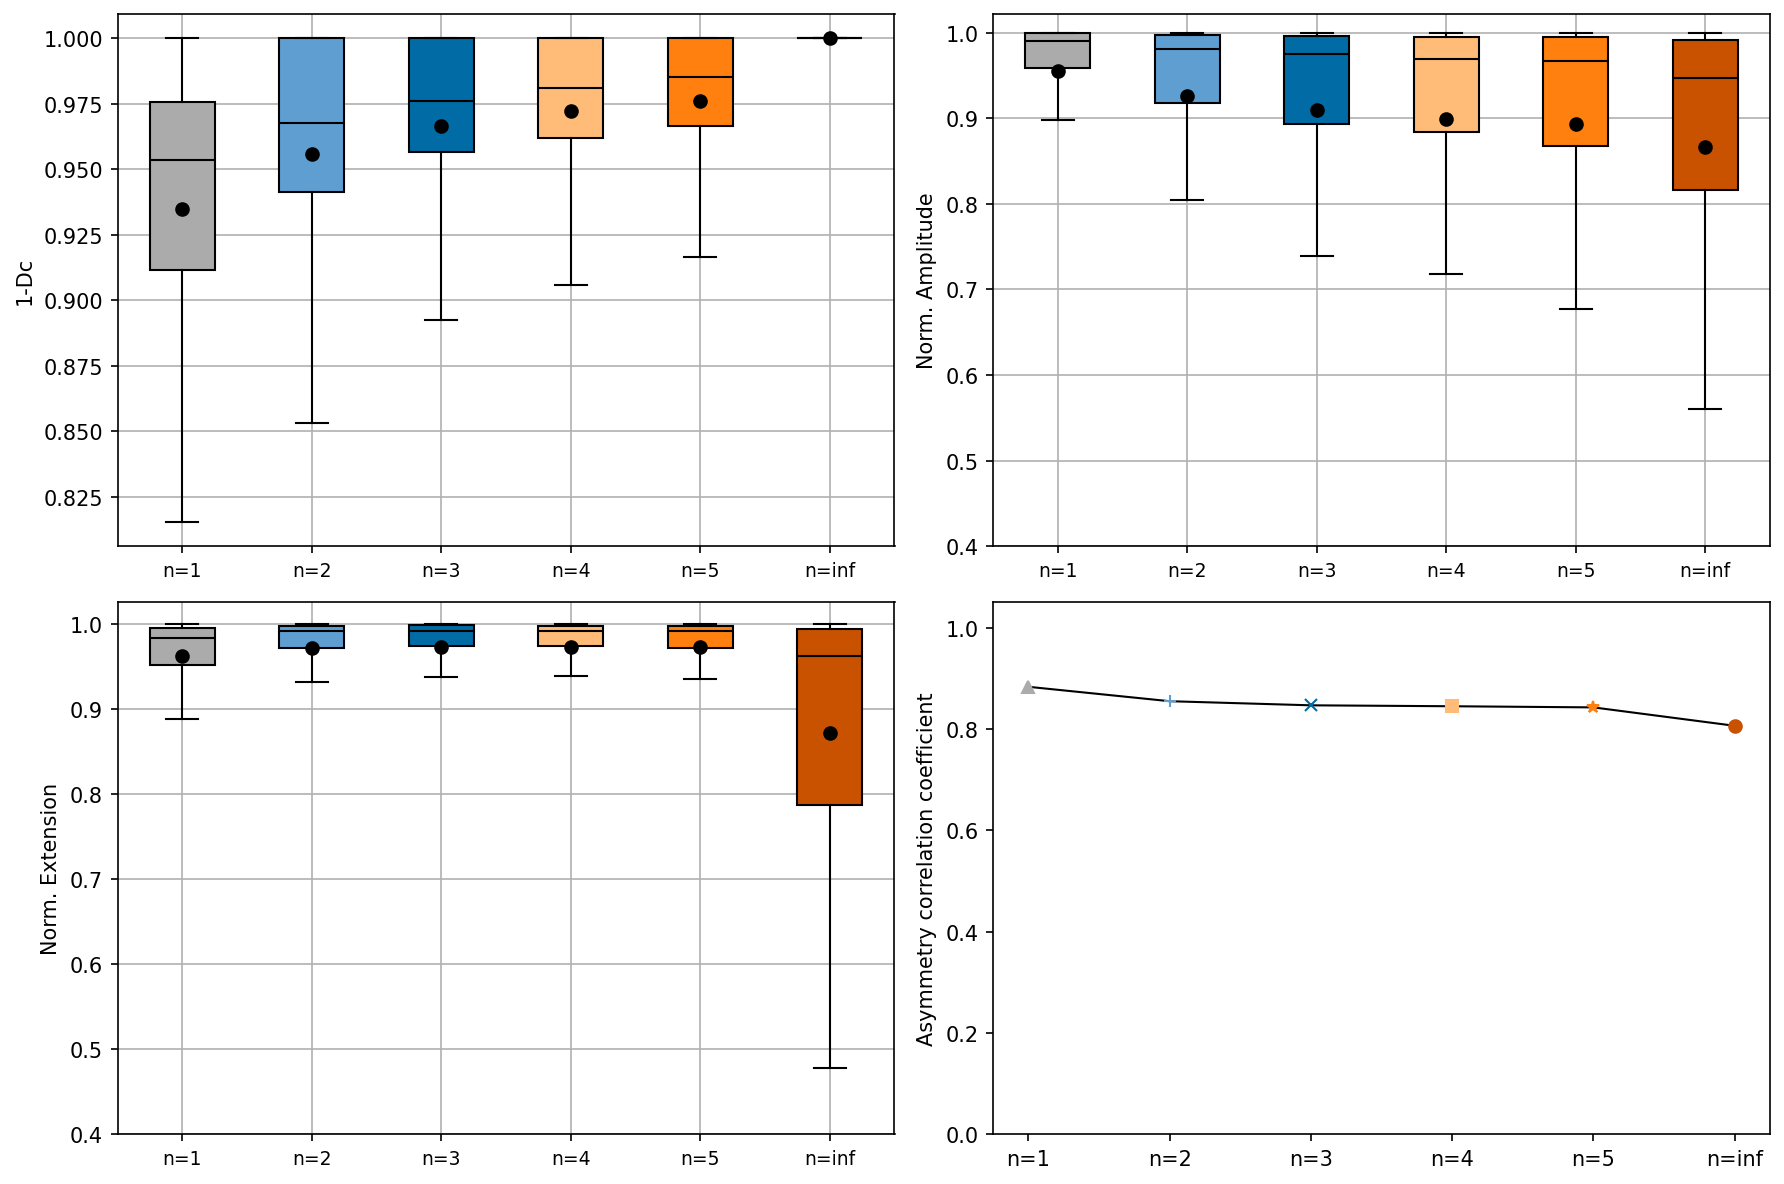

In [15]:
# show norm amplitude vs apex probability exponent
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, dpi=150, figsize=(12, 8))

for prop_name, ylabel, ax in zip(("Distance_Max_Curv", "Amplitude", "Extension"),
                                 ("1-Dc", "Norm. Amplitude", "Norm. Extension"),
                                 (ax0, ax1, ax2)
                                ):
    ax,props = df.boxplot(ax=ax, column=prop_name,
                    showmeans=True, showfliers=False,
                    patch_artist=True,
                    flierprops={'marker':'x'}, 
                    boxprops={"color":'k'},
                    whiskerprops={"color":'k'},
                    medianprops={"color":'k'},
                    meanprops={'marker':'o', 'markerfacecolor':'k', 'markeredgecolor':'k'},
                    return_type='both')
    
    for patch, color in zip(props['boxes'], n_colors):
        patch.set_facecolor(color)
    
    ax.set_xticks(np.arange(1, 7), n_labels)
    if prop_name in ("Amplitude", "Extension"):
        ax.set_ylim(0.4)

    print(f"{prop_name} for each value of n:")
    print(f"Mean: {np.nanmean(df[prop_name], axis=0)}")
    print(f"Median: {np.nanmedian(df[prop_name], axis=0)}")
    print()
        
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', labelsize=9)

ax3.plot(xticks, coeff_correl_all, 'k-', linewidth=1)
for i in range(len(coeff_correl_all)):
    ax3.plot(xticks[i], coeff_correl_all[i], marker=n_apex_markers[i], color=n_colors[i], markersize=6)
    
ax3.set_ylabel("Asymmetry correlation coefficient")
ax3.set_xticks(xticks, n_labels)
ax3.set_ylim(0.0, 1.05)

fig.tight_layout()
plt.savefig(fig_path + "real_bends_morphometry.png", dpi=150)
plt.show()

### Compute apex location according to n from raw values of curvature.

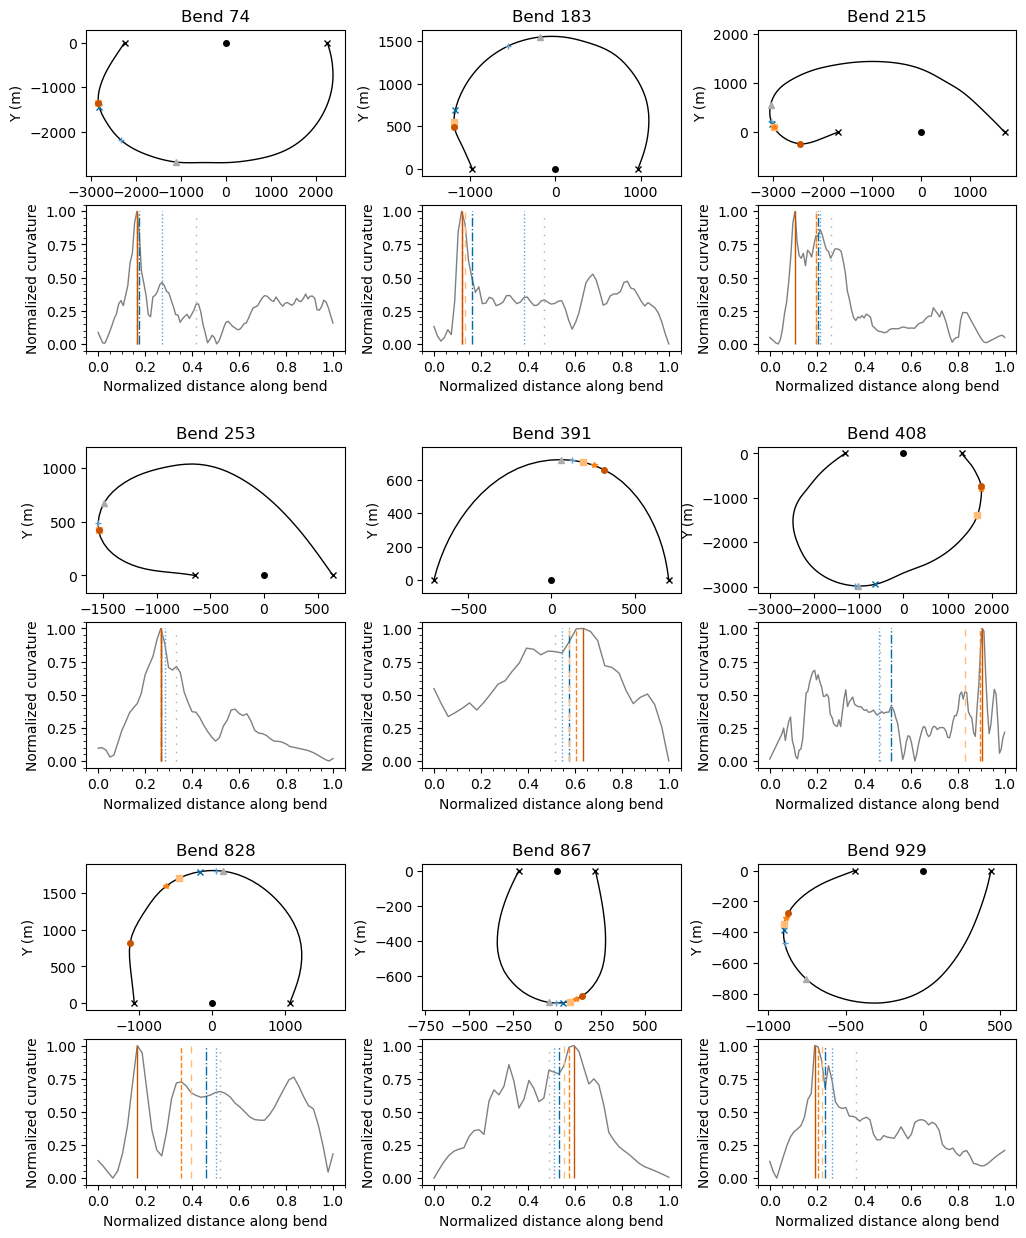

In [16]:
fig = plt.figure(figsize=(12, 15))
outer = gridspec.GridSpec(3, 3, wspace=0.3, hspace=0.3)
k = 0
cpt = 0

nb_col = len(df_names[0])*len(df_names[1])
df_raw = pd.DataFrame(np.full((int(nb_valid_bends), nb_col), np.nan), 
                  columns=df_indexes)
df_index = -1

# extract bend apex
skew_pearson_all_raw = np.full(int(nb_valid_bends), np.nan)
for centerline in centerlines:
    for bend in centerline.bends:
        if not bend.isvalid:
            cpt += 1
            continue

        df_index += 1
        coords = [cl_pt.pt[:2] for cl_pt in centerline.cl_points[bend.index_inflex_up:bend.index_inflex_down+1]]

        # translate+rotate bends for the center to be at (0,0)
        pt_center = (coords[-1] + coords[0]) / 2.
        coords -= pt_center        
        
        vec_inflex = coords[-1] - coords[0]
        vec_inflex /=  np.linalg.norm(vec_inflex)
        cos = np.dot(vec_inflex, np.array([1., 0.]))
        vec_inflex2 = np.array([vec_inflex[1], -vec_inflex[0]])
        sin = np.dot(vec_inflex2, np.array([1., 0.]))
        # rotate x,y coordinates
        rot = np.array([[cos, -sin], [sin, cos]])
        coords = np.dot(coords, rot)
        
        # compute bend apex and morphometric parameters for multiple n
        curv_abs = centerline.get_bend_property(bend.id, "Curv_abscissa")
        curv_abs_norm = (curv_abs - curv_abs.min()) / (curv_abs.max() - curv_abs.min())
        curvature = np.abs(centerline.get_bend_property(bend.id, "Curvature"))
        
        pt_center = np.array([0,0])
        ampl_max = np.max([cpf.orthogonal_distance(pt, coords[0], coords[-1]) for pt in coords])

        extension_max = np.max([cpf.distance(pt, pt_center) for pt in coords])
        d_inflex = cpf.distance(coords[0], coords[-1]) / 2.

        max_curv_index = np.argmax(curvature)
        pt_max_curv = coords[max_curv_index]

        arc_length_tot = curv_abs_norm[-1] - curv_abs_norm[0]

        mean_abs = cpf.compute_esperance(curvature, curv_abs_norm, 1)
        std_dev = cpf.compute_variance(curvature, curv_abs_norm, 1)[1]
        apex_index = cpf.compute_median_curvature_index(curvature, 1)
        skew_pearson = 3*(mean_abs - curv_abs_norm[apex_index]) / std_dev
        skew_pearson_all_raw[df_index] = -1. * skew_pearson
        
        # apex from apex probability function with varying n
        for n in range(1, 6):
            apex_index = cpf.compute_median_curvature_index(curvature, n)
            df_raw.loc[df_index, ("Apex_index", n)] = apex_index
            df_raw.loc[df_index, ("Curv_Abs", n)] = curv_abs_norm[apex_index] - curv_abs_norm[0]
            pt_apex = coords[apex_index]
            
            if (extension_max > 1.01*d_inflex): 
                df_raw.loc[df_index, ("Extension", n)] = cpf.distance(pt_center, pt_apex) / extension_max
                
            df_raw.loc[df_index, ("Amplitude", n)] = cpf.orthogonal_distance(pt_apex, coords[0], coords[-1]) / ampl_max
                
            arc_length1 = curv_abs_norm[apex_index] - curv_abs_norm[0]
            arc_length2 = curv_abs_norm[-1] - curv_abs_norm[apex_index]
            if abs(arc_length_tot) > 1e-3:
                df_raw.loc[df_index, ("Asymmetry", n)] = (arc_length1 - arc_length2) / arc_length_tot

            # distance to max curvature point
            if abs(arc_length_tot) > 1e-3:
                dist_max_cuvr = abs(curv_abs_norm[apex_index] - curv_abs_norm[max_curv_index]) / arc_length_tot
                df_raw.loc[df_index, ("Distance_Max_Curv", n)] = 1-dist_max_cuvr

        # add max curvature point
        df_raw.loc[df_index, ("Apex_index", 6)] = max_curv_index
        df_raw.loc[df_index, ("Curv_Abs", 6)] = curv_abs_norm[max_curv_index] - curv_abs_norm[0]
        df_raw.loc[df_index, ("Extension", 6)] = cpf.distance(pt_center, pt_max_curv) / extension_max
        df_raw.loc[df_index, ("Amplitude", 6)] = cpf.orthogonal_distance(pt_max_curv, coords[0], coords[-1]) / ampl_max
        arc_length1 = curv_abs_norm[max_curv_index] - curv_abs_norm[0]
        arc_length2 = curv_abs_norm[-1] - curv_abs_norm[max_curv_index]
        if abs(arc_length_tot) > 1e-3:
            df_raw.loc[df_index, ("Asymmetry", 6)] = (arc_length1 - arc_length2) / arc_length_tot
        df_raw.loc[df_index, ("Distance_Max_Curv", 6)] = 1.
               
        # show some characteristic bends       
        if cpt in ((74, 183, 253, 391, 408, 828, 867, 929, 215)):
            inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[k], wspace=0.2, hspace=0.2)
            
            ax0 = plt.Subplot(fig, inner[0])
            ax0.plot(coords[:,0], coords[:,1], 'k-', linewidth=1)
            ax0.plot(coords[0,0], coords[0,1], 'kx', markersize=4)
            ax0.plot(coords[-1,0], coords[-1,1], 'kx', markersize=4)
            ax0.plot(pt_center[0], pt_center[1], 'ko', markersize=4)               
            ax0.axis('equal')
            ax0.set_xlabel("X (m)")
            ax0.set_ylabel("Y (m)")
            ax0.set_title(f"Bend {cpt}")
        
            curv_norm = (curvature - np.min(curvature)) / (np.max(curvature) - np.min(curvature))
            ax1 = plt.Subplot(fig, inner[1])
            ax1.plot(curv_abs_norm, curv_norm, 'k-', label="Curvature Filtered", linewidth=1, alpha=0.5)
            ax1.set_ylabel("Normalized curvature")
            ax1.set_xlabel("Normalized distance along bend")
            
            for j, apex_loc in enumerate(df_raw.loc[df_index, ("Apex_index")].to_numpy().astype(int)):
                ax0.plot(coords[apex_loc][0], coords[apex_loc][1], marker=n_apex_markers[j], color=n_colors[j], markersize=4)
                ax1.vlines(curv_abs_norm[apex_loc], 0, 1, label=n_labels[n-1], linewidth=1, linestyle=n_linestyles[j], color=n_colors[j])
                
            ax1.minorticks_on()
            #ax1.legend(ncol=2, loc='lower center')
            fig.add_subplot(ax0)
            fig.add_subplot(ax1)
            k += 1
            
        cpt += 1

plt.savefig(fig_path + "real_bends_raw_curvature.png", dpi=150)
plt.show()

Spearman coeff: SignificanceResult(statistic=0.848202112141128, pvalue=0.0)
Pearson coeff: PearsonRResult(statistic=0.8529722733489689, pvalue=0.0)
Kendall coeff: SignificanceResult(statistic=0.6620939447026404, pvalue=8.61650476560828e-278)

Spearman coeff: SignificanceResult(statistic=0.8444654366332782, pvalue=0.0)
Pearson coeff: PearsonRResult(statistic=0.8373836930685266, pvalue=0.0)
Kendall coeff: SignificanceResult(statistic=0.6584043975348323, pvalue=9.894156487505028e-275)

Spearman coeff: SignificanceResult(statistic=0.8185046533951988, pvalue=3.80102730991e-312)
Pearson coeff: PearsonRResult(statistic=0.7964358949943033, pvalue=1.6844980179132267e-283)
Kendall coeff: SignificanceResult(statistic=0.6363950059602234, pvalue=7.850675832762966e-257)

Spearman coeff: SignificanceResult(statistic=0.7967791700547123, pvalue=6.431824047501324e-284)
Pearson coeff: PearsonRResult(statistic=0.7619830278500603, pvalue=3.177017746586476e-245)
Kendall coeff: SignificanceResult(statistic=0

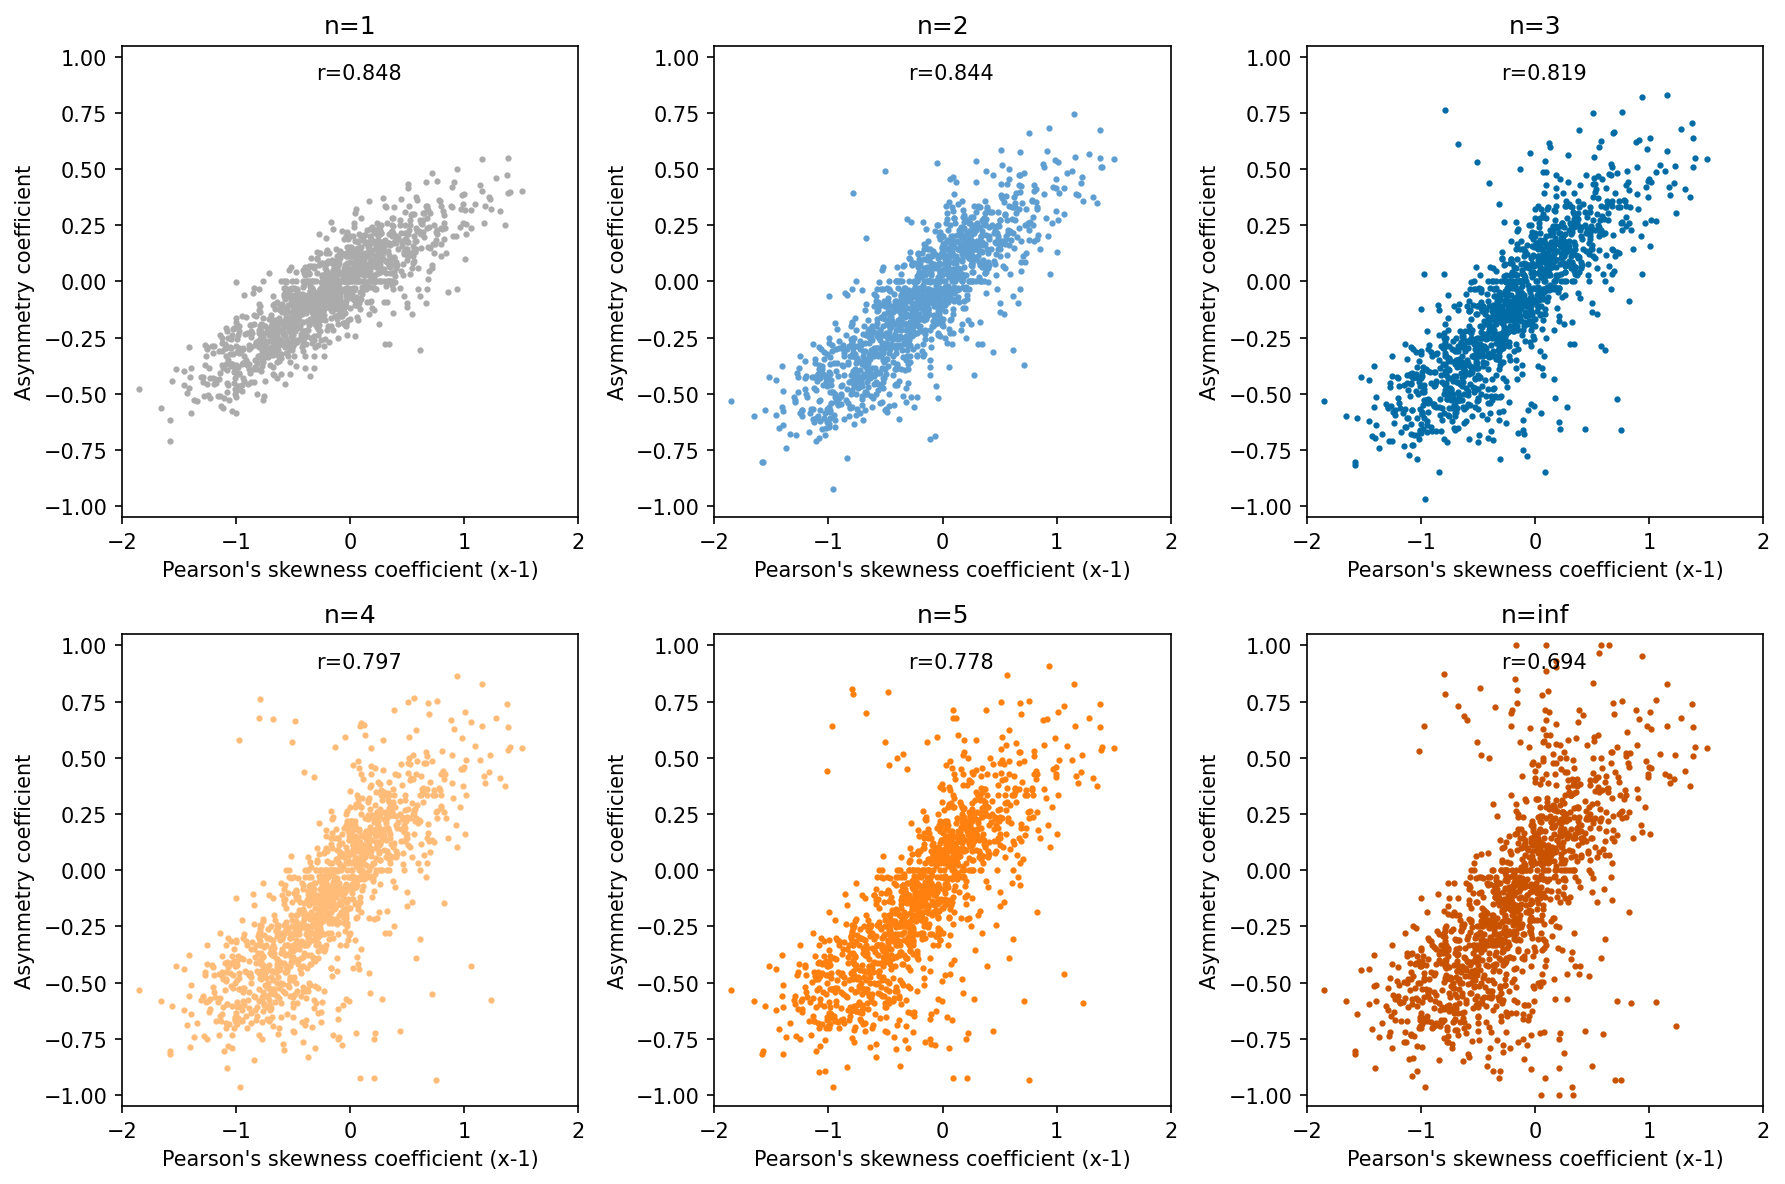

In [17]:
coeff_correl_all_raw = np.full(6, np.nan)
fig, axes = plt.subplots(2, 3, dpi=150, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    n = i+1
    values = df_raw["Asymmetry", n]
    ax.plot(skew_pearson_all_raw, values, 'o', color=n_colors[i], markersize=2)
    ax.set_xlim(-2.0, 2.0)
    ax.set_ylim(-1.05, 1.05)
    ax.set_xlabel("Pearson's skewness coefficient (x-1)")
    ax.set_ylabel("Asymmetry coefficient")
    ax.set_title(f"{n_labels[i]}") 

    sp = spearmanr(skew_pearson_all_raw, values, nan_policy='omit', alternative='greater')
    ax.text(-0.3, 0.9, f"r={round(sp[0], 3)}")
    
    coeff_correl_all_raw[i] = sp[0]
    print(f"Spearman coeff: {sp}")   # Spearman's rho
    print(f"Pearson coeff: {pearsonr(skew_pearson_all_raw, values, alternative='greater')}")  # Kendall's tau
    print(f"Kendall coeff: {kendalltau(skew_pearson_all_raw, values, nan_policy='omit', alternative='greater')}")  # Kendall's tau
    print()

plt.tight_layout()
plt.savefig(fig_path + "skewness_correlation_raw_curvature.png", dpi=150)
plt.show()

Distance_Max_Curv for each value of n:
Mean: [0.89564155 0.92756132 0.94610782 0.95756782 0.96470517 1.        ]
Median: [0.9200417  0.95837515 0.96972525 0.97885274 0.98551088 1.        ]

Amplitude for each value of n:
Mean: [0.94663772 0.89651494 0.86472752 0.8466939  0.83591786 0.7915965 ]
Median: [0.98799489 0.97171353 0.96094087 0.95127223 0.94686085 0.91105895]

Extension for each value of n:
Mean: [0.97881707 0.98825277 0.98408913 0.97967711 0.97593795 0.88097136]
Median: [0.99488483 0.99764283 0.99583206 0.99404415 0.99269257 0.95572633]



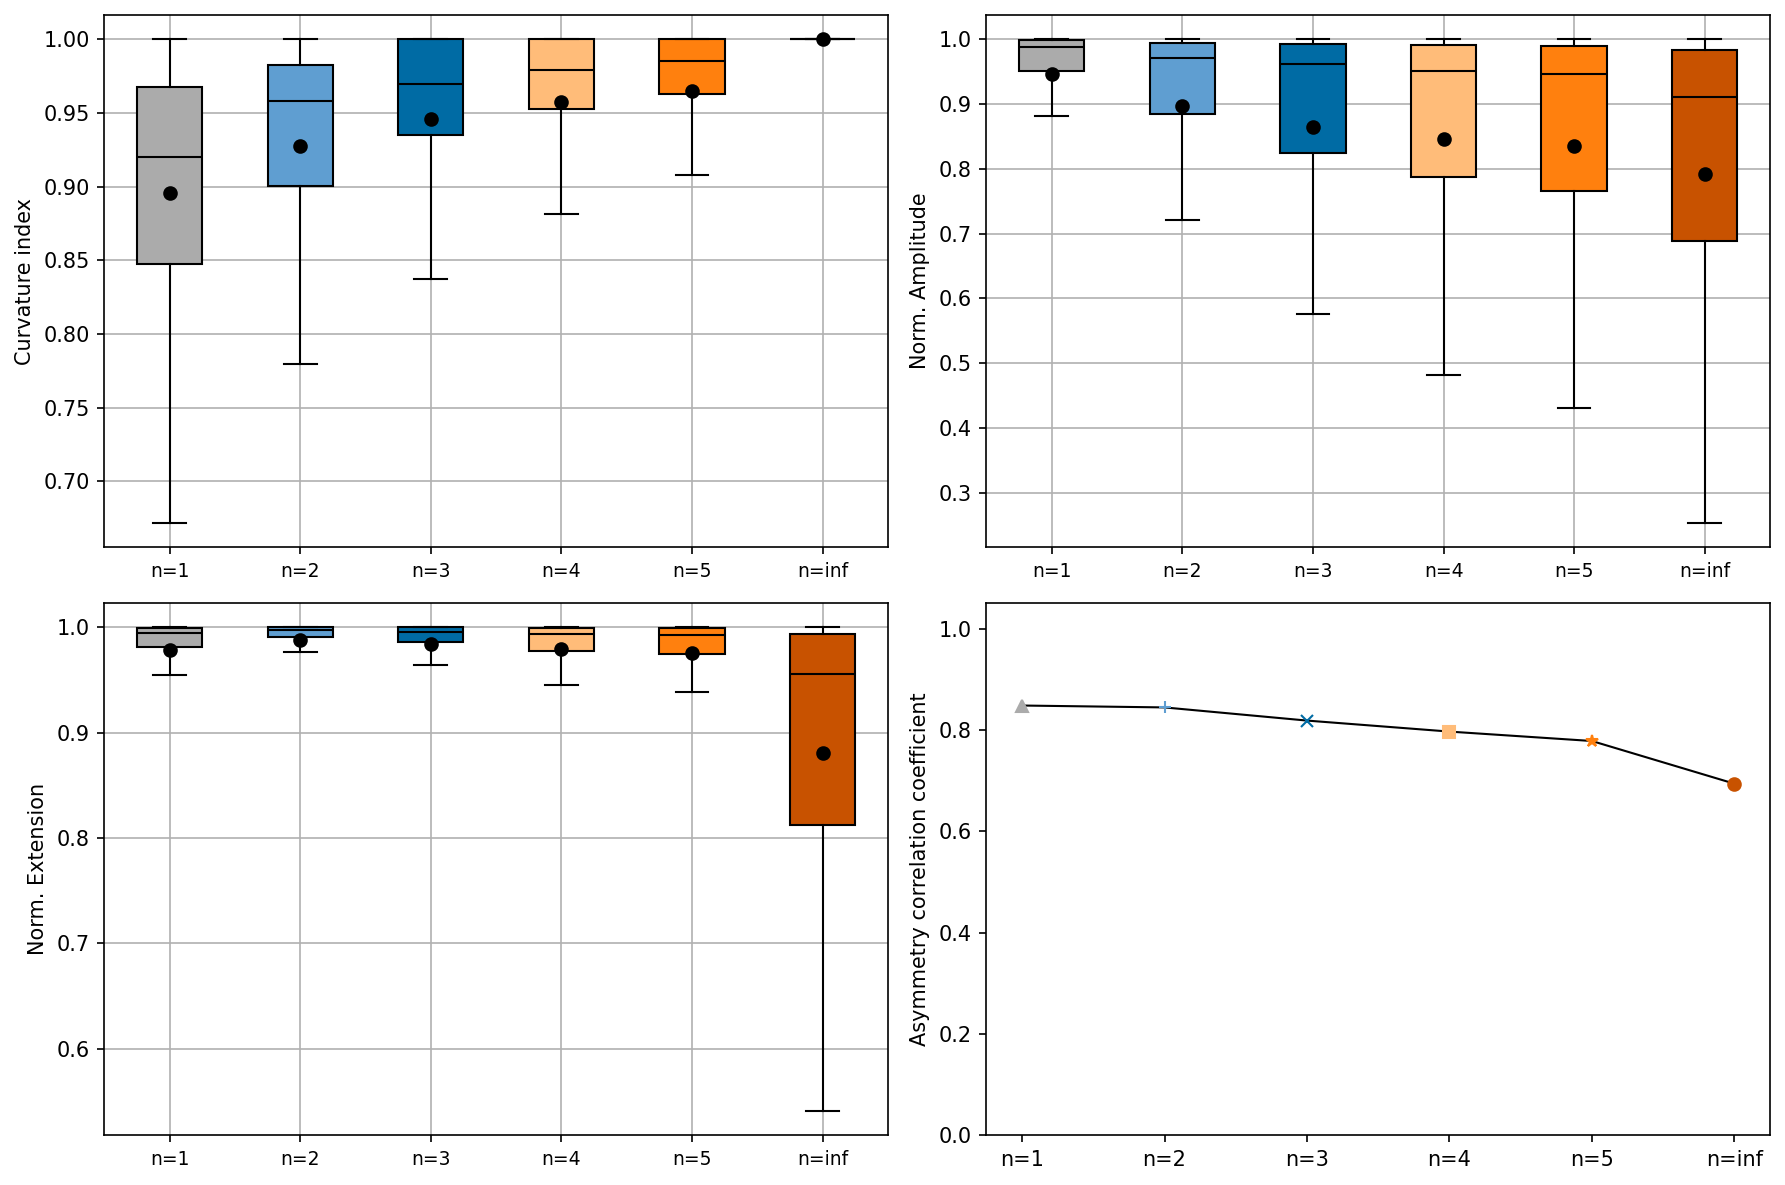

In [18]:
# show norm amplitude vs apex probability exponent
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, dpi=150, figsize=(12, 8))

for prop_name, ylabel, ax in zip(("Distance_Max_Curv", "Amplitude", "Extension"),
                                 ("Curvature index", "Norm. Amplitude", "Norm. Extension"),
                                 (ax0, ax1, ax2)
                                ):
    ax,props = df_raw.boxplot(ax=ax, column=prop_name,
                    showmeans=True, showfliers=False,
                    patch_artist=True,
                    flierprops={'marker':'x'}, 
                    boxprops={"color":'k'},
                    whiskerprops={"color":'k'},
                    medianprops={"color":'k'},
                    meanprops={'marker':'o', 'markerfacecolor':'k', 'markeredgecolor':'k'},
                    return_type='both')
    
    for patch, color in zip(props['boxes'], n_colors):
        patch.set_facecolor(color)
    
    ax.set_xticks(np.arange(1, 7), n_labels)

    print(f"{prop_name} for each value of n:")
    print(f"Mean: {np.nanmean(df_raw[prop_name], axis=0)}")
    print(f"Median: {np.nanmedian(df_raw[prop_name], axis=0)}")
    print()
        
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', labelsize=9)

ax3.plot(xticks, coeff_correl_all_raw, 'k-', linewidth=1)
for i in range(len(coeff_correl_all_raw)):
    ax3.plot(xticks[i], coeff_correl_all_raw[i], marker=n_apex_markers[i], color=n_colors[i], markersize=6)
    
ax3.set_ylabel("Asymmetry correlation coefficient")
ax3.set_xticks(xticks, n_labels)
ax3.set_ylim(0.0, 1.05)

fig.tight_layout()
plt.savefig(fig_path + "real_bends_morphometry_raw_curvature.png", dpi=150)
plt.show()
plt.close()

Compute distance of apex points when they are computed either from filtered curvature distribution or raw curvature distribution.

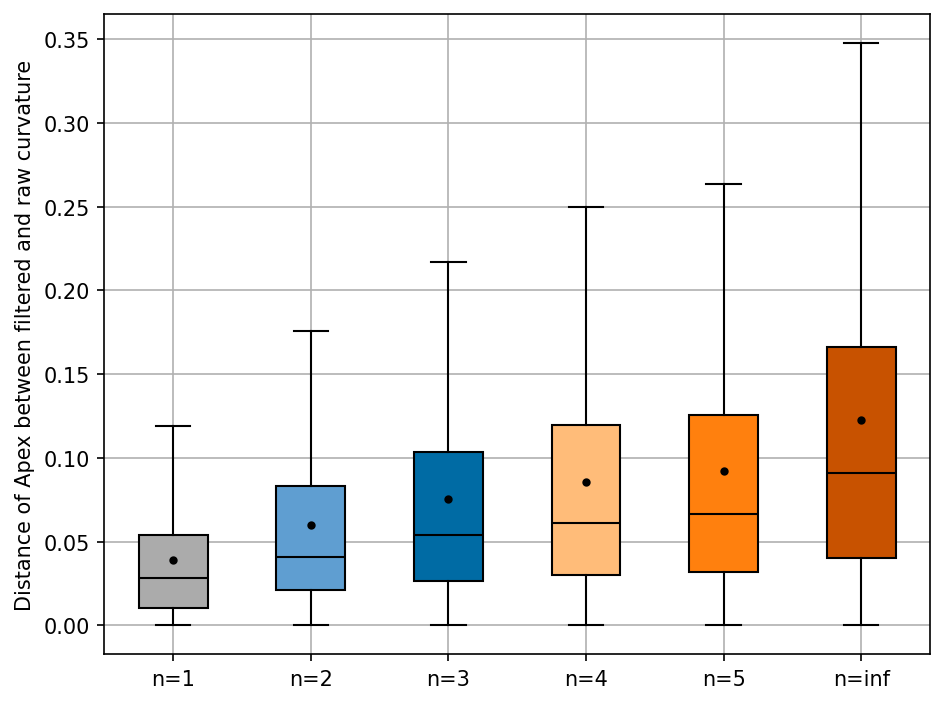

In [19]:
dist = np.zeros((df.shape[0], 6))
for i, row in df.iterrows():
    for k in range(6):
        n = k+1
        s_smooth = row["Curv_Abs", n]
        s_raw = df_raw.loc[i, ("Curv_Abs", n)]
        dist[i, k] = abs(s_smooth-s_raw)
    
fig, ax = plt.subplots(1, 1, dpi=150)               
bp = ax.boxplot(dist, 
                patch_artist=True,
                showmeans=True, 
                showfliers=False,
                meanprops={'marker':'o', 'markerfacecolor':'k', 'markeredgecolor':'k', 'markersize':'3',},
                medianprops={'color':'k',}
               )

for n, patch in enumerate(bp["boxes"]):
    patch.set_facecolor(n_colors[n]) 

ax.set_xticks(np.arange(1, 7), n_labels)
ax.set_ylabel("Distance of Apex between filtered and raw curvature")
plt.grid()
plt.tight_layout()
plt.savefig(fig_path + "Distance_Raw_vs_Smooth_Curvature.png", dpi=150)
plt.show()
plt.close()

## References

- Kinoshita, R. (1961), Investigation of channel deformation in Ishikari River, Publ., vol. 36, p. 139, Nat. Resour. Div., Minist. of Sci. and Technol. of Jpn, Tokyo
- Lemay and Grimaud (in prep.)
- Sylvester, Z., Durkin, P., Covault, J.A. and Sharman, G.R. (2019). High curvatures drive river meandering. Geology, 47, e486–e486, doi: 10.1130/G46838Y.1
